In [1]:
# General libraries:
import pandas as pd
import numpy as np
import scipy.stats as st
import math as mt
import random as rd
import warnings

# Data visualization libraries:
import matplotlib.pyplot as plt
import matplotlib.markers as mrk
import seaborn as sns
try: # importing plotly
    import plotly.express as px
    import plotly.graph_objects as go
except: # installing plotly using pip (in case environment lack the library)
    !pip install plotly-express
    import plotly.express as px
    import plotly.graph_objects as go


In [2]:
# Creating an Index Slice variable -
idx = pd.IndexSlice

In [3]:
# Interimly disabling warnings -
warnings.filterwarnings('ignore')

In [4]:
# Loading the data file
try:
    games = pd.read_csv('games.csv') # load data on local path

except:
    games = pd.read_csv('games.csv')

In [5]:
# Checking the first 10 rows of the data -
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
# Checcking the last 10 rows of the data -
games.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [7]:
# Describing the data -
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
# Calculating the share of missing values in the `games` DF -
print('\033[1m\x1b[4mPercentage of missing values in the `games` DF\x1b[0m:\n\n',\
      round(games.isna().sum() / len(games.isna()) * 100, ndigits=3), sep='')

Percentage of missing values in the `games` DF:

Name                0.012
Platform            0.000
Year_of_Release     1.609
Genre               0.012
NA_sales            0.000
EU_sales            0.000
JP_sales            0.000
Other_sales         0.000
Critic_Score       51.319
User_Score         40.090
Rating             40.479
dtype: float64


In [9]:
# Checking for complete dupicated rows -
print('\033[1m\x1b[1mCompletely duplicated rows in the DF:\x1b[0m', games.duplicated().sum())

# Checking for duplicated names -
print('\033[1m\x1b[1mDuplicated `Name` values in the DF:\x1b[0m', games['Name'].duplicated().sum())

Completely duplicated rows in the DF: 0
Duplicated `Name` values in the DF: 5155


In [10]:
# Lowercasing the columns' names -
games.columns = games.columns.str.lower()

# Checking new columns' names -
# Printing the DF's new columns' names -
print('\033[1m\x1b[4mThe `games` DF new columns names\x1b[0m:\n', sep='\n')
print(' | '.join(map(str, games.columns)))

The `games` DF new columns names:

name | platform | year_of_release | genre | na_sales | eu_sales | jp_sales | other_sales | critic_score | user_score | rating


In [11]:
# Filter rows where 'name' is missing into a variable -
missing_name = games[games['name'].isna()]

# Display rows -
display(missing_name)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
# Sanity Check- Before operation:
print("\033[1m\x1b[1mBefore\x1b[0m the operation amount of rows in the `games` DF :", len(games))

# Filtering the data to drop the rows with missing values in the 'name' and 'genre' columns -
games = games[~games['name'].isna()]

# Sanity Check- Before operation:
print("\033[1m\x1b[1mAfter\x1b[0m the operation amount of rows in the `games` DF :", len(games))
print(f'\033[1m\x1b[4mRows dropped\x1b[0m - {len(missing_name)} rows.')

Before the operation amount of rows in the `games` DF : 16715
After the operation amount of rows in the `games` DF : 16713
Rows dropped - 2 rows.


In [13]:
# Creating a filtered DF with all rows containing missing release year value -
filt_df = games[games['year_of_release'].isna()]

# Checking why the `year_of_release` values are missing by looking at the filtered DF -
display(filt_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
# Creating the 'extracted_year' column which include all of the games with release year in their title -
filt_df['extracted_year'] = \
games['name'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype('I');

# Amount of missing values left in the column, if any -
print('The total amount of missing values in the column:',\
     filt_df['year_of_release'].isna().sum());

# Since all years are missing in that filtered DF,
# we can just overwrite the column with the `extracted_year` column -
filt_df['year_of_release'] = filt_df['extracted_year']

# Amount of missing values left in the column, if any -
print('The amount of missing values left in the column (after filling column with `extracted_year`):',\
     filt_df['year_of_release'].isna().sum());

# Dropping games where extracted numerical values weren't the release year -
filt_df = filt_df[filt_df['year_of_release'] >= 1960];

# Amount of missing values left in the column, if any -
print('The amount of missing values left in the column (after dropping non-year numerical values):',\
     filt_df['year_of_release'].isna().sum());

# Printing fixed rows -
print("\nThe amount of rows where the game's title contained their release year:", len(filt_df));
display(filt_df);


The total amount of missing values in the column: 269
The amount of missing values left in the column (after filling column with `extracted_year`): 203
The amount of missing values left in the column (after dropping non-year numerical values): 0

The amount of rows where the game's title contained their release year: 18


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,extracted_year
183,Madden NFL 2004,PS2,2004.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004.0
377,FIFA Soccer 2004,PS2,2004.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004.0
475,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006.0
1650,NASCAR Thunder 2003,PS2,2003.0,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,2003.0
2492,MLB SlugFest 20-03,PS2,2003.0,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E,2003.0
2572,PES 2009: Pro Evolution Soccer,PSP,2009.0,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2009.0
3486,Madden NFL 2002,XB,2002.0,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,2002.0
4775,NFL GameDay 2003,PS2,2003.0,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E,2003.0
5156,NBA Live 2003,XB,2003.0,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E,2003.0
5336,Tomb Raider (2013),PC,2013.0,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,2013.0


In [15]:
# Sanity Check- Before operation:
print("\033[1m\x1b[1mBefore the operation amount of missing values in column:\x1b[0m", games['year_of_release'].isna().sum())

# Dropping all missing values in the `year_of_release` column -
games = games[~games['year_of_release'].isna()]

# Sanity Check- After operation:
print("\033[1m\x1b[1mAfter the operation amount of missing values in column:\x1b[0m", games['year_of_release'].isna().sum())

Before the operation amount of missing values in column: 269
After the operation amount of missing values in column: 0


In [16]:
# Creating a filtered DF containing all rows where all 3 rating columns are missing -
overlap_missing_ratings = games[(games['critic_score'].isna())\
                                & (games['user_score'].isna())\
                                & (games['rating'].isna())]

# Checking amount of rows in the data -
print(f'The share of the rows where all rating columns contain missing values: \
{len(overlap_missing_ratings) / len(games):.2%}')

# Amount of possible unreleased games -
possible_unreleased = overlap_missing_ratings\
.query("na_sales == 0 & eu_sales == 0 & jp_sales == 0 & other_sales == 0 & year_of_release == 2016")
print(f'Amount of unreleased games (no sales or ratings and released in 2016): \
{len(possible_unreleased)} matching rows.')

# Taking a glance of the data -
display(overlap_missing_ratings)

The share of the rows where all rating columns contain missing values: 39.73%
Amount of unreleased games (no sales or ratings and released in 2016): 0 matching rows.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
# A) Creating a counter dictionary -
genre_mode_rating = {}

# Finding each `genre` mode `rating` value and storing it in the dictionary -
for g in games['genre'].unique():
    genre_mode_rating[g] = games[games['genre']==g]['rating'].mode()[0]

# -------------------------------------------------------------------------------------------------------------------------
# B) Creating the mode_rating() function,
# which will fill missing rating value with the mode value for each genre in each row -
def mode_rating(row):
    if pd.isna(row["rating"]):
        row['rating'] = genre_mode_rating[row['genre']]
    return row

# -------------------------------------------------------------------------------------------------------------------------
# c) Filling the column:
# Sanity-check BEFORE fillment of missing values:
print(f"Sanity check-\nNumber of missing values \033[1m\x1b[4mbefore\x1b[0m filling them: {games['rating'].isna().sum()}",\
      end='\n\n')

# Filling the `rating` column's missing values with the mode_rating() function -
games = games.apply(mode_rating, axis=1)

# Sanity-check AFTER fillment of missing values:
print(f"Sanity check-\nNumber of missing values \033[1m\x1b[4mafter\x1b[0m filling them: {games['rating'].isna().sum()}")

Sanity check-
Number of missing values before filling them: 6676

Sanity check-
Number of missing values after filling them: 0


In [18]:
# Checking the amount of 'tbd' values in the column -
print("\033[1m\x1b[1mAmount of 'tbd' values in the column:\x1b[0m", len(games[games['user_score'] == "tbd"]),\
     "\n\033[1m\x1b[1mShare of the column:\x1b[0m", round(len(games[games['user_score'] == "tbd"]) / len(games) * 100,\
                                                          ndigits=2), '%\n')
print('─' * 125, end='\n\n') # divider

# Sanity Check- Before operation:
print("\033[1m\x1b[4mBefore\x1b[0m the operation amount of NaN's in column:", games['user_score'].isna().sum())

# Changing all 'tbd' columns to `NaN` values -
games['user_score'] = games['user_score'].replace('tbd', np.nan).astype('float64')

# Sanity Check- After operation:
print("\033[1m\x1b[4mAfter\x1b[0m the operation amount of NaN's in column:", games['user_score'].isna().sum())

Amount of 'tbd' values in the column: 2376 
Share of the column: 14.45 %

─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Before the operation amount of NaN's in column: 6605
After the operation amount of NaN's in column: 8981


In [19]:
# Missing values Check -
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [20]:
# Creating the `dup_check` DF to check for duplicates -
dup_check = games[['name', 'platform']]

# Printing amount of duplicates -
print(f"\033[1m\x1b[1mAmount of duplicated rows in the `dup_check`:\x1b[0m {len(dup_check[dup_check.duplicated()])} rows.")

# Checking for duplicates of the same games on the same platforms -
dup_check[dup_check.duplicated()]

Amount of duplicated rows in the `dup_check`: 3 rows.


,name,platform
1591,Need for Speed: Most Wanted,X360
11715,Need for Speed: Most Wanted,PC
16230,Madden NFL 13,PS3


In [21]:
# Checking the first game rows where platform was 'X360' or 'PC' -
games.query("name == 'Need for Speed: Most Wanted' & (platform == 'PC' | platform == 'X360')")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


In [22]:
# Checking the second game rows where platform was 'PS3' -
games.query("name == 'Madden NFL 13' & platform == 'PS3'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [23]:
# Adding the duplicate row's sales numbers -
games.loc[604,'eu_sales'] += games.loc[16230,'eu_sales']

# Sanity Check- Before operation:
print("\033[1m\x1b[4mBefore\x1b[0m the operation rows amount:", len(games))

# Dropping the duplicate row from the DF -
games.drop(16230, axis=0, inplace=True)

# Sanity Check- After operation:
print("\033[1m\x1b[4mAfter\x1b[0m the operation rows amount:", len(games))

Before the operation rows amount: 16444
After the operation rows amount: 16443


In [24]:
# Sanity Check- Before operation:
print("\033[1m\x1b[4mBefore\x1b[0m the operation 'year_of_release' column's dtype :", games['year_of_release'].dtype)

# Changing the 'year_of_release' dtype to Int64 -
games['year_of_release'] = games['year_of_release'].astype('int64')

# Sanity Check- After operation:
print("\033[1m\x1b[4mAfter\x1b[0m the operation 'year_of_release' column's dtype :", games['year_of_release'].dtype)

Before the operation 'year_of_release' column's dtype : float64
After the operation 'year_of_release' column's dtype : int64


In [25]:
# Sanity Check- Before operation:
print(f"\033[1m\x1b[4mBefore\x1b[0m the operation:\n\
\t'platform' column's dtype - {games['platform'].dtype}\n\
\t'genre' column's dtype - {games['genre'].dtype}\n\
\t'rating' column's dtype - {games['rating'].dtype}")

# Changing the columns' dtypes to category -
games['platform'] = pd.Categorical(games.platform) # for 'platform'
games['genre'] = pd.Categorical(games.genre) # for 'genre'
games['rating'] = pd.Categorical(games.rating) # for 'rating'

# Sanity Check- After operation:
print(f"\n\033[1m\x1b[1mProcess being made...\x1b[0m\n\n\
\033[1m\x1b[4mAfter\x1b[0m the operation:\n\
\t'platform' column's dtype - {games['platform'].dtype}\n\
\t'genre' column's dtype - {games['genre'].dtype}\n\
\t'rating' column's dtype - {games['rating'].dtype}", end='\n\n')

# Checking the DF info() to see how dtypes changed -
display(games.info())

Before the operation:
	'platform' column's dtype - object
	'genre' column's dtype - object
	'rating' column's dtype - object

Process being made...

After the operation:
	'platform' column's dtype - category
	'genre' column's dtype - category
	'rating' column's dtype - category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16443 non-null  object  
 1   platform         16443 non-null  category
 2   year_of_release  16443 non-null  int64   
 3   genre            16443 non-null  category
 4   na_sales         16443 non-null  float64 
 5   eu_sales         16443 non-null  float64 
 6   jp_sales         16443 non-null  float64 
 7   other_sales      16443 non-null  float64 
 8   critic_score     7982 non-null   float64 
 9   user_score       7462 non-null   float64 
 10  rating           16443 non-null  category


None

In [26]:
# Creating the `total_sales` column
# which is basicaly the sum of all sales for each game from all areas -
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# Describing the new column -
print("\033[1m\x1b[4mDescribing the new `total_sales' column\x1b[0m:"), display(games['total_sales'].describe());

Describing the new `total_sales' column:


count    16443.000000
mean         0.536056
std          1.558829
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

In [27]:
# Creating the `years_since_release` column,
# which represents the amount of years since a game's been released -
games['years_since_release'] = 2017 - games['year_of_release']

# Describing the new column -
print("\033[1m\x1b[4mDescribing the new `years_since_release' column\x1b[0m:"), display(games['years_since_release'].describe());

Describing the new `years_since_release' column:


count    16443.000000
mean        10.514079
std          5.875546
min          1.000000
25%          7.000000
50%         10.000000
75%         14.000000
max         37.000000
Name: years_since_release, dtype: float64

In [28]:
# Creating the `mean_yearly_sales` parameter,
# which states the average sales per year for the amount of years since each game's been released -
games['mean_yearly_sales'] = round(games['total_sales'] / games['years_since_release'], ndigits=5)

# Describing the new column -
print("\033[1m\x1b[4mDescribing the new `mean_yearly_sales' column\x1b[0m:"), display(games['mean_yearly_sales'].describe());

Describing the new `mean_yearly_sales' column:


count    16443.000000
mean         0.072893
std          0.249868
min          0.000000
25%          0.006670
50%          0.018750
75%          0.053330
max          7.600000
Name: mean_yearly_sales, dtype: float64

In [29]:
# Checking the general information about the DataFrame -
print('\033[1m\x1b[4mGeneral information about the data\x1b[0m:\n');
display(games.info());

# Describing the DF columns -
print('\033[1m\x1b[4mDescription of the data\x1b[0m:'),;
display(games.describe());

# print a sample of data to get a general glimpse of how each row looks -
print('\n\033[1m\x1b[4mA random sample of the data\x1b[0m:');
display(games.sample(5));

General information about the data:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 16443 non-null  object  
 1   platform             16443 non-null  category
 2   year_of_release      16443 non-null  int64   
 3   genre                16443 non-null  category
 4   na_sales             16443 non-null  float64 
 5   eu_sales             16443 non-null  float64 
 6   jp_sales             16443 non-null  float64 
 7   other_sales          16443 non-null  float64 
 8   critic_score         7982 non-null   float64 
 9   user_score           7462 non-null   float64 
 10  rating               16443 non-null  category
 11  total_sales          16443 non-null  float64 
 12  years_since_release  16443 non-null  int64   
 13  mean_yearly_sales    16443 non-null  float64 
dtypes: category(3), float64(8), int64

None

Description of the data:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,years_since_release,mean_yearly_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,7982.000000,7462.000000,16443.000000,16443.000000,16443.000000
mean,2006.485921,0.264028,0.145939,0.078492,0.047597,68.992608,7.126548,0.536056,10.514079,0.072893
std,5.875546,0.818400,0.506731,0.311109,0.188011,13.920049,1.499429,1.558829,5.875546,0.249868
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000,7.000000,0.006670
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000,10.000000,0.018750
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000,14.000000,0.053330
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000,37.000000,7.600000



A random sample of the data:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,years_since_release,mean_yearly_sales
6482,Naruto: Ultimate Ninja Heroes,PSP,2006,Fighting,0.26,0.00,0.00,0.00,70.0,6.6,T,0.26,11,0.02364
6950,Street Fighter EX2 Plus,PS,1998,Fighting,0.13,0.09,0.00,0.02,NaN,NaN,T,0.24,19,0.01263
8282,Jikkyou Powerful Pro Baseball 2016,PS4,2016,Sports,0.00,0.00,0.17,0.00,NaN,NaN,E,0.17,1,0.17000
2305,Hot Shots Tennis,PS2,2006,Sports,0.17,0.13,0.55,0.05,70.0,8.1,E,0.90,11,0.08182
12683,Exist Archive: The Other Side of the Sky,PSV,2015,Role-Playing,0.01,0.00,0.05,0.00,71.0,8.3,T,0.06,2,0.03000


In [30]:
# Defining a function that gets rid of the double index:
def flat_DoubleIdx(df, idx1_col, idx2_col, reset_index=True, reorder=False, drop_one=False, drop_two=False):
    '''
    The flat_DoubleIdx() function is used to flatten 2-levels MultiIndex (or Double-Index),
    and split the tupled indices to separate columns before dropping the original index.

    Parameters:
    df: The MultiIndexed DataFrame to flatten.
    idx1_col: The name of the index tuple first column. Also the 1st-level in the original DataFrame's MultiIndex.
    idx2_col: The name of the index tuple second column. Also the 2nd-level in the original DataFrame's MultiIndex.
    reset_index: True by default, resetting the original DataFrame's MultiIndex and dropping the old one.
    reorder: Placing the Index column/s at the beginning of the DataFrame. False by default.
             Currently designed only to flatten a 2-leveled MultiIndex.
    drop_one: Recover only the second index from the tuple and dropping the first. False by default.
    drop_two: Recover only the first index from the tuple and dropping the second. False by default.
    '''

    # Flattening the `df` double (2-leveled) index -
    df.index = df.index.to_flat_index()

    # Salvaging the indices values from the tupled indices -
    idx_1 = [x[0] for x in df.index]
    idx_2 = [x[1] for x in df.index]

    # re-Creating the `idx_1` and `idx_2` columns -
    if drop_two == False:
        df[idx1_col] = idx_1
    if drop_one == False:
        df[idx2_col] = idx_2

    # Resetting index (As long as reset_index=True)-
    df.reset_index(drop=True,inplace=reset_index)

    # Placing the former index tuple's columns at the start of the DataFrame -
    if reorder==True:
        # Storing former-index column' name -
        if (drop_one == False) and (drop_two == False): # default procedure
            col_name_fir = df[idx1_col].name
            col_name_sec = df[idx2_col].name

        elif (drop_one == True) and (drop_two == True): # If user set both drop parameters to True
            print('\033[1m\x1b[31mError:\x1b[0m Cannot set both `drop_two` and `drop_one` to True.')


        # Reordering the columns -
        if (drop_two == False) and (drop_one == False): # while both MultiIndex columns in DataFrame
            # Storing columns in interior variables -
            fir_col = df.pop(col_name_fir)
            sec_col = df.pop(col_name_sec)
            # Inserting the columns at the beginning of the DataFrame -
            df.insert(0,col_name_sec,sec_col)
            df.insert(0,col_name_fir,fir_col)


        elif (drop_two == True) or (drop_one == True): # If user set both drop parameters to True
            print('\033[1m\x1b[31mDevError:\x1b[0m \n\
            Function currently doesn\'t reorder while the drop_two or drop_one parameters are True.')

In [31]:
# Aggregating the data to present each unique game's stats in all platform:
# -------------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------------
# A) Creating a pivot table that sums the stats from all platforms for each game,
# including games that were released under same title in different years:

# Creating an aggfunc parameter dictionary -
aggdict = {'na_sales':'sum',
           'eu_sales':'sum',
           'jp_sales':'sum',
           'other_sales':'sum',
           'total_sales':'sum',
           'mean_yearly_sales':'mean',
           }
# Creating the pivot table -
unique_games = games.pivot_table(index=['name', 'year_of_release'],\
                                 values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', \
                                         'mean_yearly_sales', 'total_sales'],\
                                aggfunc=aggdict)

# -------------------------------------------------------------------------------------------------------------------------
# B) Getting rid of the double index and
# placing the new columns in the beginning of the DF -
flat_DoubleIdx(unique_games,'name','year_of_release',reorder=True)

# -------------------------------------------------------------------------------------------------------------------------
# c) Check the new DF -
display(unique_games)

,name,year_of_release,eu_sales,jp_sales,mean_yearly_sales,na_sales,other_sales,total_sales
0,Beyblade Burst,2016,0.00,0.03,0.03000,0.00,0.00,0.03
1,Fire Emblem Fates,2015,0.23,0.52,0.83500,0.81,0.11,1.67
2,Frozen: Olaf's Quest,2013,0.53,0.00,0.13750,0.48,0.09,1.10
3,Haikyu!! Cross Team Match!,2016,0.00,0.04,0.04000,0.00,0.00,0.04
4,Tales of Xillia 2,2012,0.12,0.45,0.16800,0.20,0.07,0.84
...,...,...,...,...,...,...,...,...
12190,thinkSMART FAMILY!,2010,0.00,0.00,0.00429,0.03,0.00,0.03
12191,thinkSMART: Chess for Kids,2011,0.00,0.00,0.00167,0.01,0.00,0.01
12192,uDraw Studio,2010,0.57,0.00,0.34571,1.65,0.20,2.42
12193,uDraw Studio: Instant Artist,2011,0.10,0.00,0.01583,0.07,0.02,0.19


In [32]:
# Aggregating the data to present each unique game's stats in all platform:
# -------------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------------
# A) Creating a pivot table that sums the stats from all platforms for each game,
# including games that were released under same title in different years:

# Creating an aggfunc parameter dictionary -
aggdict = {'na_sales':'sum',
           'eu_sales':'sum',
           'jp_sales':'sum',
           'other_sales':'sum',
           'total_sales':'sum',
           'mean_yearly_sales':'mean',
           }
# Creating the pivot table -
unique_plats = games.pivot_table(index=['platform', 'year_of_release'],\
                                 values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', \
                                         'mean_yearly_sales', 'total_sales'],\
                                aggfunc=aggdict)

# -------------------------------------------------------------------------------------------------------------------------
# B) Getting rid of the double index and
# placing the new columns in the beginning of the DF -
flat_DoubleIdx(unique_plats,'platform','year_of_release',reorder=True)

# Getting rid of rows where the platforms didn't make sales -
unique_plats['total_sales'].replace(0,np.nan, inplace=True)
unique_plats.dropna(inplace=True)

# -------------------------------------------------------------------------------------------------------------------------
# c) Check the new DF -
display(unique_plats)

,platform,year_of_release,eu_sales,jp_sales,mean_yearly_sales,na_sales,other_sales,total_sales
0,2600,1980,0.67,0.00,0.034174,10.59,0.12,11.38
1,2600,1981,1.96,0.00,0.021546,33.40,0.32,35.68
2,2600,1982,1.65,0.00,0.022921,26.92,0.31,28.88
3,2600,1983,0.34,0.00,0.015615,5.44,0.06,5.84
4,2600,1984,0.01,0.00,0.008180,0.26,0.00,0.27
...,...,...,...,...,...,...,...,...
1101,XB,2008,0.04,0.00,0.020000,0.13,0.01,0.18
1143,XOne,2013,5.34,0.02,0.249474,11.85,1.75,18.96
1144,XOne,2014,18.15,0.14,0.295464,30.97,4.81,54.07
1145,XOne,2015,18.47,0.17,0.375875,36.03,5.47,60.14


In [33]:
# Defining the peak_years() function,
# which find the best sales years for each platform -
def peak_years(df):
    peak_years = {}
    for uniq_p in df['platform'].unique():
        peak_sales = df.query('platform==@uniq_p').sort_values('total_sales', ascending=False).iloc[0,1]
        peak_years[uniq_p] = peak_sales
    return df['platform'].map(peak_years)

# Creating the `peak_year` column -
unique_plats['peak_year'] = peak_years(unique_plats)

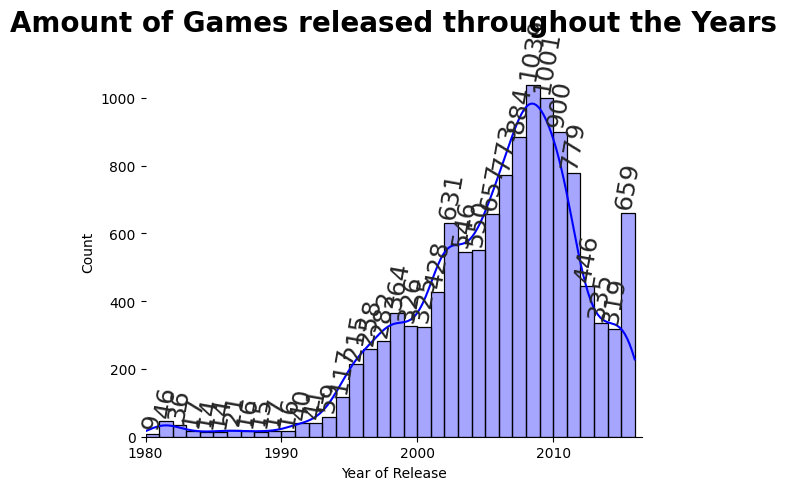

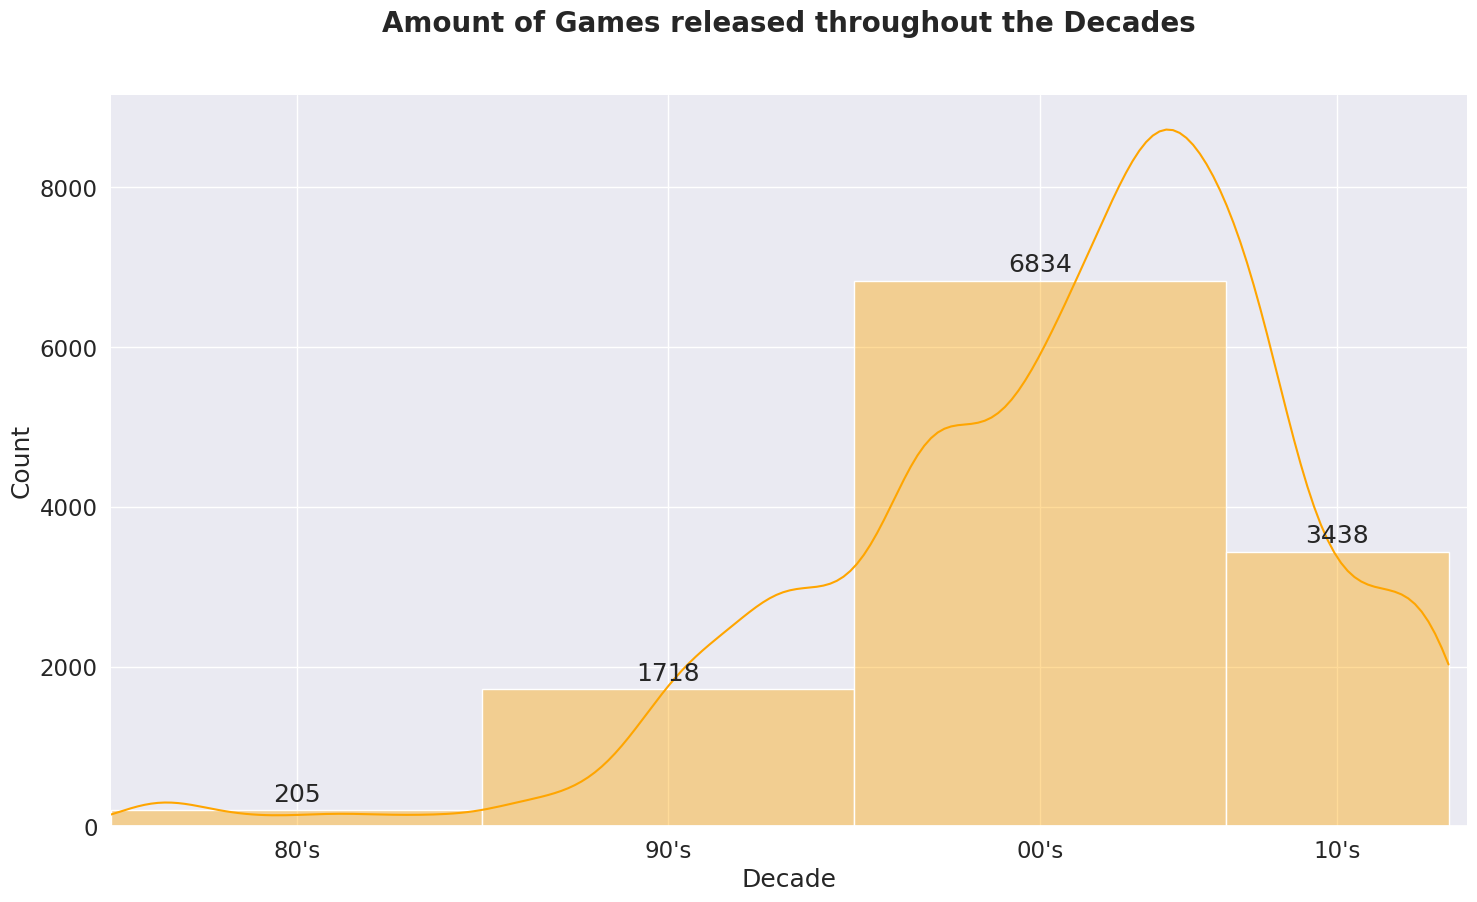

Some statistics:
Amount of games released in the last milenia (before 2000): 1923
The share of the games released in the last milenia in the data: 11.69%


In [34]:
## Plotting 2 plots to show the amounts of released games throughout the years and throughout each decade:
# -------------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------------
# A) Plot amount of released games through all of the 36 documented years in the data -
ax = sns.histplot(data=unique_games, bins=36, x='year_of_release', kde=True, color='blue', alpha=0.35)

# Plot modifications -
plt.xlim(1980,2016.5), plt.xlabel('Year of Release')
sns.despine(left=True)
sns.set(font_scale=1.5, rc = {'figure.figsize':(17.5,9.5)})
plt.title('Amount of Games released throughout the Years',\
          fontdict = {'fontsize':20, 'fontweight':'bold'}, y=1.075)
for item in ax.bar_label(ax.containers[0], padding = 1.75): item.set_rotation(80)

# Show plot -
plt.show()
# -------------------------------------------------------------------------------------------------------------------------
# B) Plot amount of released games through each decade (2010 to 2016 is considered a decade in here) -
bins_list = [1980,1990,2000,2010,2016]
ax = sns.histplot(data=unique_games, bins=bins_list, x='year_of_release', kde=True, color='orange', alpha=0.4)

# Plot modifications -
plt.xlim(1980,2016.5), plt.xticks(ticks=[1985,1995,2005,2013], labels=["80's","90's","00's","10's"]);
plt.xlabel('Decade');
sns.despine(left=True)
sns.set(font_scale=1.5, rc = {'figure.figsize':(17.5,9.5)})
plt.title('Amount of Games released throughout the Decades',\
          fontdict = {'fontsize':20, 'fontweight':'bold'}, y=1.075)
ax.bar_label(ax.containers[0], padding = 2.75)

# Show plot -
plt.show()

# Printing some stats -
last_milenia_games = unique_games.query('year_of_release < 2000')
print(f'\033[1m\x1b[4mSome statistics\x1b[0m:\n\
Amount of games released in the last milenia (before 2000): {len(last_milenia_games)}\n\
The share of the games released in the last milenia in the data: {len(last_milenia_games)/len(games):.2%}')


Some stats:
The average all time Ice games' sales of a platform: $284.335M
The median all time Ice games' sales of a platform: SNES $200.04M


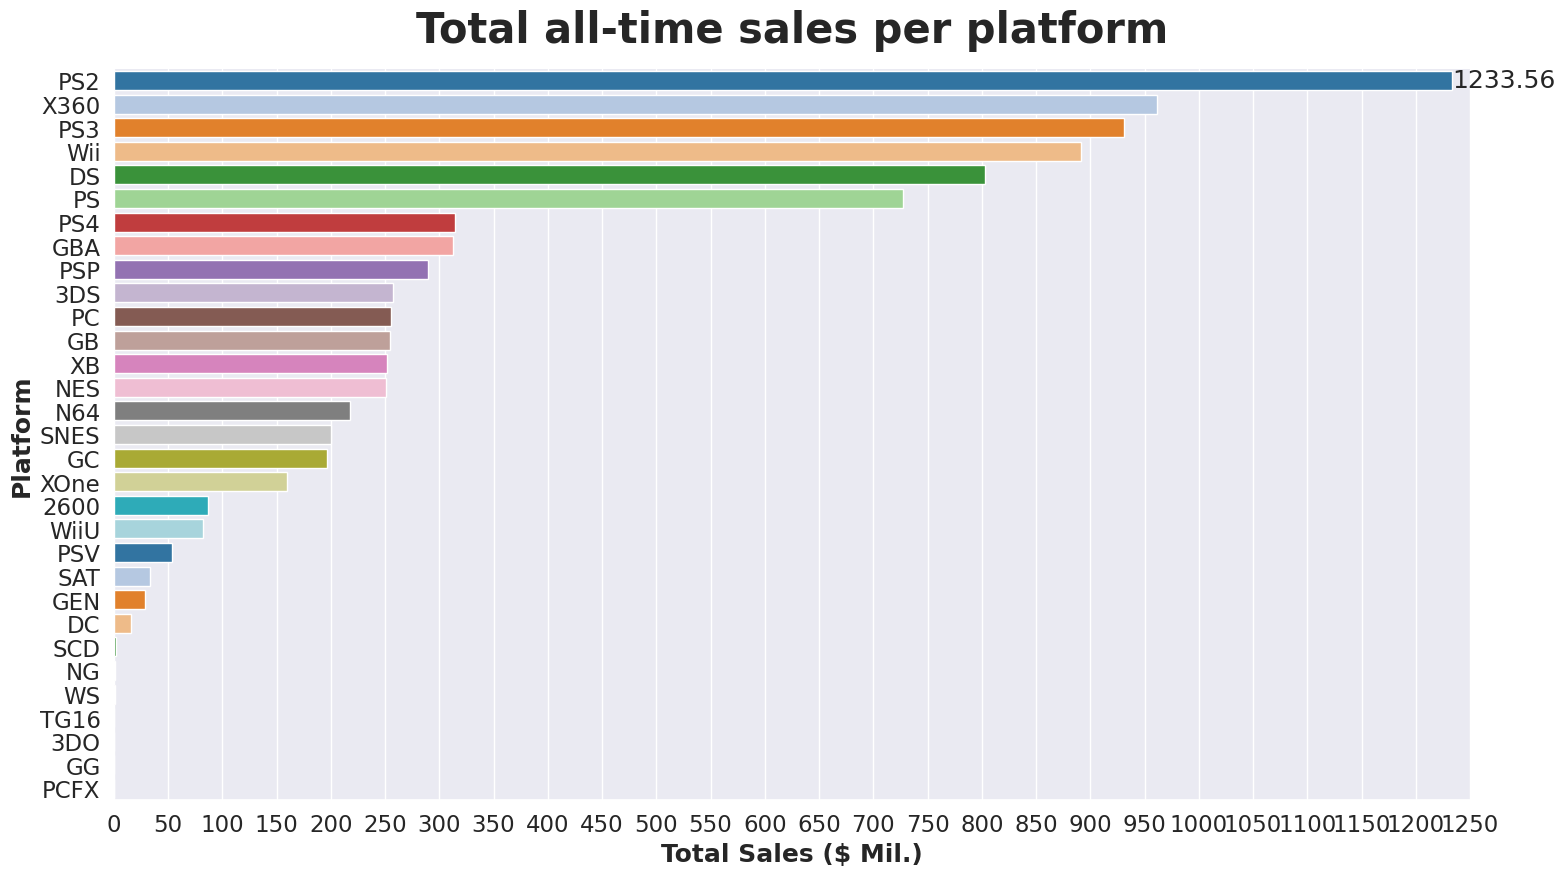

In [35]:
# Creating a total all-time sales per platform for the games in the data -
sales_per_plat = games.pivot_table(values='total_sales', index='platform', aggfunc='sum')

# Printing some stats -
print(f'\033[1m\x1b[4mSome stats\x1b[0m:\n\
\033[1m\x1b[1mThe average all time Ice games\' sales of a platform:\x1b[0m \
${round(sales_per_plat.mean()[0], ndigits=3)}M\n\
\033[1m\x1b[1mThe median all time Ice games\' sales of a platform:\x1b[0m SNES \
${round(sales_per_plat.median()[0], ndigits=3)}M')

# Creating a plotting order
# to show platforms from the most profitable to the least profitable -
order_to_plot = sales_per_plat.sort_values('total_sales', ascending=False).index

# Plotting the all-time sales per platform -
ax = sns.barplot(data=sales_per_plat, y=sales_per_plat.index, x='total_sales',\
           palette='tab20', order=order_to_plot)

# Adding bar labels -
ax.bar_label(ax.containers[0])

# Setting custumized modification parameters:
plt.title('Total all-time sales per platform',\
          fontdict = {'fontsize':30, 'fontweight':'bold'}, y=1.025)
sns.despine(left=True)
sns.set(font_scale=1.3, style='whitegrid', rc = {'figure.figsize':(17.5,10.5)})
plt.xlim(0,1250), plt.xticks(range(0,1300,50));
plt.xlabel('Total Sales ($ Mil.)', fontdict = {'fontsize':18, 'fontweight':'bold'}), \
plt.ylabel('Platform', fontdict = {'fontsize':18, 'fontweight':'bold'});

# Show plot -
plt.show()

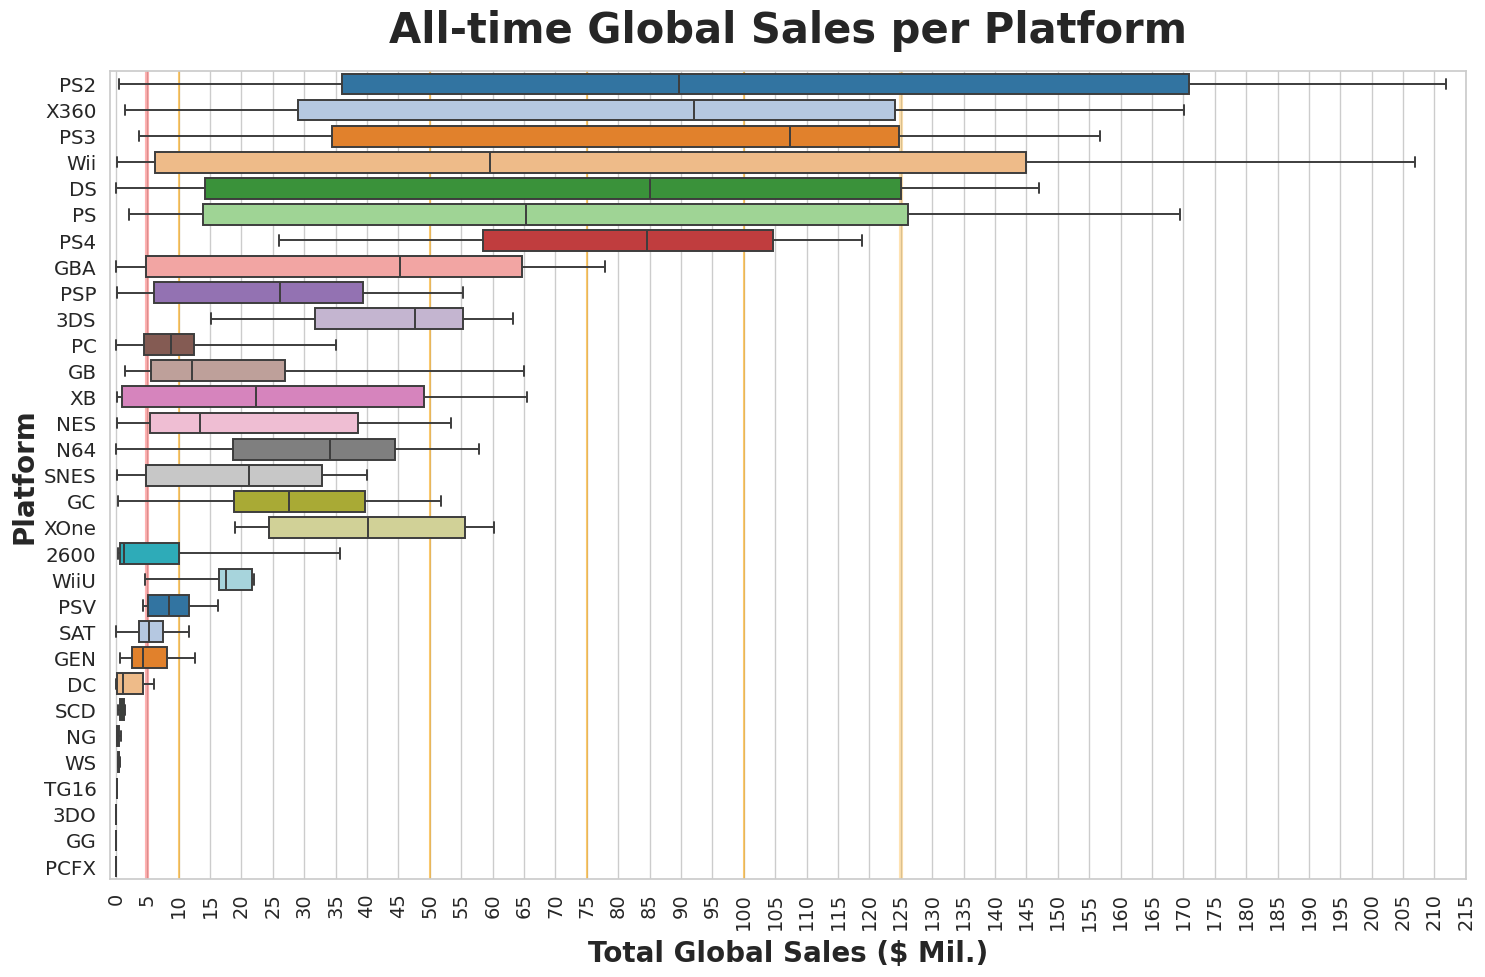

Some stats for the platforms' sales leaders:

PS2 platform:
	Variance: 6305.27
	STD: 79.41

X360 platform:
	Variance: 3304.46
	STD: 57.48

PS3 platform:
	Variance: 2985.26
	STD: 54.64

Wii platform:
	Variance: 6262.56
	STD: 79.14

DS platform:
	Variance: 3803.58
	STD: 61.67

PS platform:
	Variance: 4013.44
	STD: 63.35



In [36]:
# Adding lines showing separation between each decade -
plt.axvline(10,0,1, c='orange', alpha=0.55), plt.axvline(50,0,1, c='orange', alpha=0.55);
plt.axvline(75,0,1, c='orange', alpha=0.55), plt.axvline(100,0,1, c='orange', alpha=0.55);
plt.axvline(5,0,1, c='red', alpha=0.3, linewidth=3), plt.axvline(125,0,1, c='orange', alpha=0.3, linewidth=3);

# Creating a plotting order
# to show platforms from the most profitable to the least profitable -
order_to_plot = sales_per_plat.sort_values('total_sales', ascending=False).index

# Plotting a boxplot for the all-time global sales per platform -
ax = sns.boxplot(data=unique_plats, x='total_sales', y='platform', \
            linewidth=1.4, fliersize=10, whis=18, palette='tab20', order=order_to_plot)

# Setting customized modification parameters for plot:
plt.title('All-time Global Sales per Platform',\
          fontdict = {'fontsize':30, 'fontweight':'bold'}, y=1.025)
sns.set(font_scale=1.3, style='whitegrid', rc = {'figure.figsize':(17.5,10.5)})
# Mods for ticks and labels -
plt.xlim(-1,215), plt.xticks(range(0,220,5), rotation=90, size=14);
plt.xlabel('Total Global Sales ($ Mil.)', fontdict = {'fontsize':20, 'fontweight':'bold'}, labelpad=6.5);
plt.ylabel('Platform', fontdict = {'fontsize':20, 'fontweight':'bold'});
# Show plot -
plt.show()

# Printing some stats -
print('\033[1m\x1b[4mSome stats for the platforms\' sales leaders\x1b[0m:\n')
for p in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    var = unique_plats[unique_plats['platform']==p]['total_sales'].var()
    std = unique_plats[unique_plats['platform']==p]['total_sales'].std()
    print(f'\033[1m\x1b[4m{p} platform\x1b[0m:\n\t\
\033[1m\x1b[1mVariance:\x1b[0m {var:.6}\n\t\033[1m\x1b[1mSTD:\x1b[0m {std:.4}\n')

In [37]:
# A) Creating a filtered DF that contain sales only for the top 4 platforms -
top4 = games[(games['platform'] == 'PS2') |
            (games['platform'] == 'X360') |
            (games['platform'] == 'PS3') |
            (games['platform'] == 'Wii')].reset_index(drop=True)

# ------------------------------------------------------------------------------------------------------------------------
# B) Making the `top4_sales_p_y` pivot table out of the filtered DF
# to sum sales per year for each platform per active years-
top4_sales_p_y = top4.pivot_table(values='total_sales', index=['platform','year_of_release'], aggfunc='sum')\
.query('platform =="PS2" | platform=="X360" | platform=="PS3" | platform=="Wii"')

# Flattening Double Index -
flat_DoubleIdx(top4_sales_p_y,'platform','year_of_release', reorder=True)

# Getting rid of rows where the platforms didn't make sales -
top4_sales_p_y['total_sales'].replace(0,np.nan, inplace=True)
top4_sales_p_y.dropna(inplace=True)
# ------------------------------------------------------------------------------------------------------------------------
# C) Printing some stats:
# Print a `platform` value counts -
print('\033[1m\x1b[4mDistribution of games between platforms\' sales leaders\x1b[0m:\n',\
      top4['platform'].value_counts()[:4], sep='');

# Print each platform lifetime -
top4plats= ['PS2','X360','PS3','Wii']
print('\n\033[1m\x1b[4mTop 4 Platforms\' Lifetime\x1b[0m:')
for p in top4plats:
    print(f"\033[1m\x1b[1m{p}\x1b[0m: \
{games[games['platform'] == p]['year_of_release'].min()}-{games[games['platform'] == p]['year_of_release'].max()}")

print('\n\033[1m\x1b[4mDescription of the top 4 platforms\' sales per year\x1b[0m \
\033[1m\x1b[1m(`top4_sales_p_y` DF)\x1b[0m:', end='')
display(top4_sales_p_y.describe())

Distribution of games between platforms' sales leaders:
PS2     2127
PS3     1305
Wii     1286
X360    1232
Name: platform, dtype: int64

Top 4 Platforms' Lifetime:
PS2: 2000-2011
X360: 2005-2016
PS3: 2006-2016
Wii: 2006-2016

Description of the top 4 platforms' sales per year (`top4_sales_p_y` DF):

,year_of_release,total_sales
count,46.000000,46.000000
mean,2009.434783,87.333043
std,4.107728,67.032165
min,2000.000000,0.180000
25%,2007.000000,21.147500
50%,2009.500000,91.995000
75%,2012.750000,140.915000
max,2016.000000,211.810000


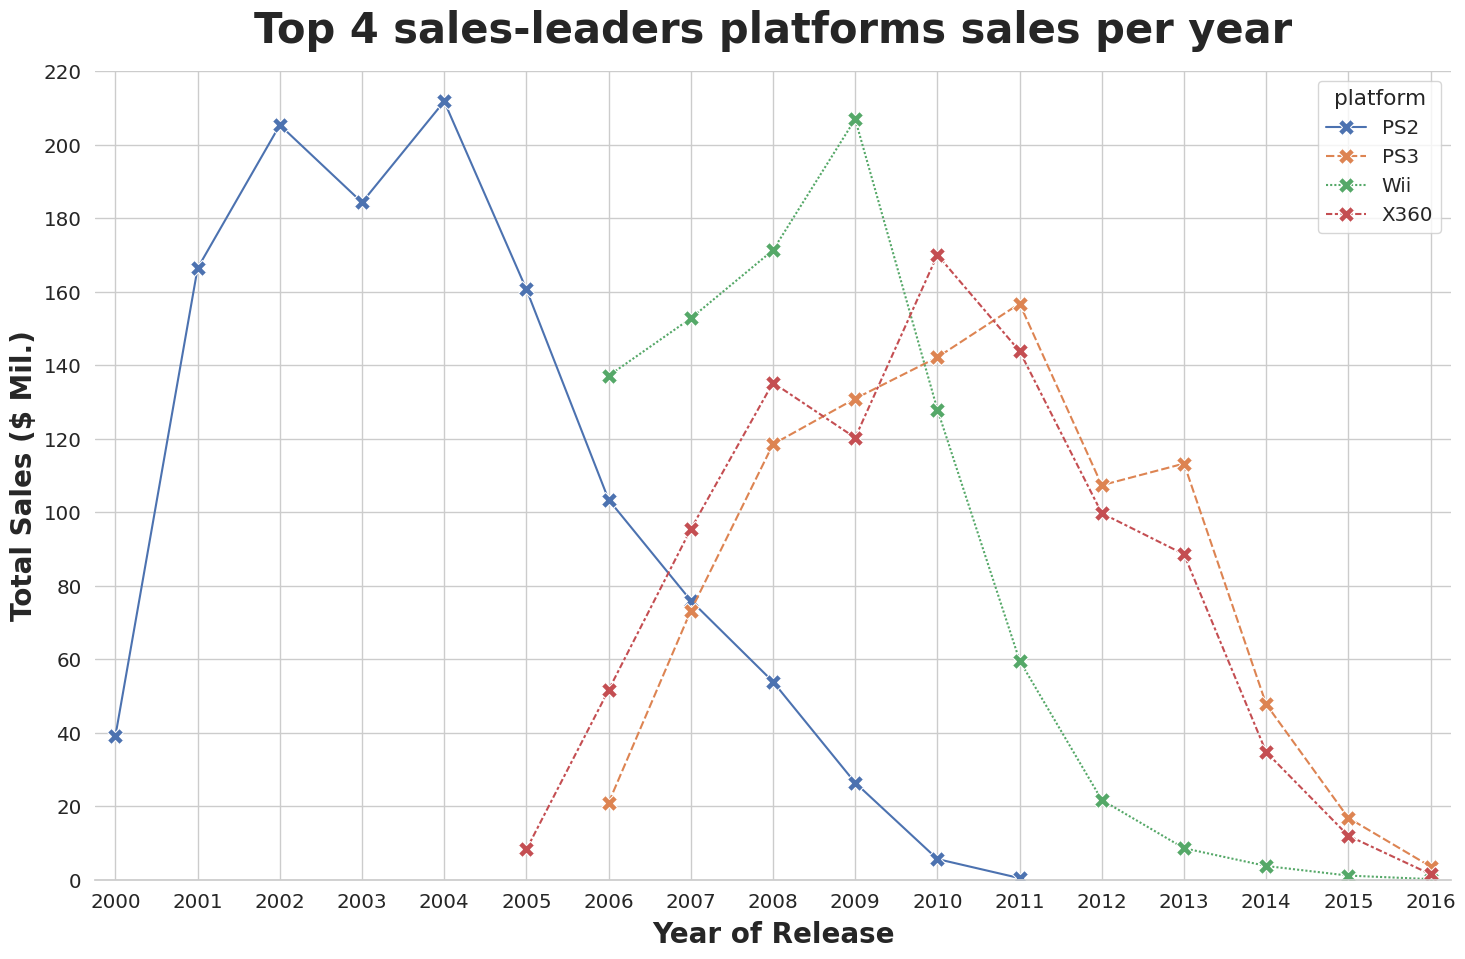

In [38]:
# Setting customized markers
M = mrk.MarkerStyle(marker="X", fillstyle='full')

# Plotting sales per year for the top 4 sales-leaders platforms -
sns.lineplot(data=top4_sales_p_y, x='year_of_release', y='total_sales', \
             hue='platform', style='platform', markers=[M,M,M,M], ms=12)

# Setting custumized modification parameters:
plt.title('Top 4 sales-leaders platforms sales per year',\
          fontdict = {'fontsize':30, 'fontweight':'bold'}, y=1.025)
sns.set(font_scale=1.65, style='whitegrid', rc = {'figure.figsize':(18.5,9)})
sns.despine(left=True, top=True)
plt.xlim(1999.75,2016.25), plt.xticks(range(2000,2017,1));
plt.ylim(0,220,20), plt.yticks(range(0,240,20))
plt.xlabel('Year of Release', fontdict = {'fontsize':20, 'fontweight':'bold'}, labelpad=6.5);
plt.ylabel('Total Sales ($ Mil.)', fontdict = {'fontsize':20, 'fontweight':'bold'});

# Show plot -
plt.show()

In [39]:
# Creating a function that places the last column in the beginning of the DF -
def last_to_first(df):
    '''
    The last_to_first() function place the last column in the beginning of the DataFrame.
    '''
    col_name = df.iloc[:,-1].name
    cols = df.columns
    cols = cols.insert(0,col_name)
    return df.reindex(columns=cols).iloc[:,:-1]

# Creating a DF that show the lifetime range of each platform -
range_per_plat = games.pivot_table(values='year_of_release', index='platform', aggfunc=['min','max'])

# Unstacking the columns' MultiIndex -
range_per_plat = range_per_plat.stack()

# Flattening the index -
flat_DoubleIdx(range_per_plat,'platform','',drop_one=True)

# Placing the former-index column in the beginning of the DF -
range_per_plat = last_to_first(range_per_plat)

# Adding the `lifespan` column that represent the amount of years the platform stayed on the market.
# P.S. The plus 1 at the end will represent the following year (i.e. `max`), as there were still sales that year -
range_per_plat['lifespan'] = range_per_plat['max'] - range_per_plat['min'] + 1

# Adding the `active_years` of each platform,
# which are the amount of years where each platform has made sales during it's lifespan -
active_years = {} # Creating a counter
for p in unique_plats['platform']: # Adding only the amount of years which each platform made sales on
    active_years[p] =len(np.array(unique_plats.query("platform==@p & total_sales!=0")['year_of_release']))
# Creating the column from the `active_years` dictionary -
range_per_plat['active_years'] = range_per_plat['platform'].map(active_years)

# Adding the `activity_ratio` column,
# Which shows the percentage of years the platform has been active in it's lifespan -
range_per_plat['activity_ratio'] = round(range_per_plat['active_years'] / range_per_plat['lifespan'], ndigits=3)

# Adding the `total_sales` column from the `sales_per_plat` DF we created before -
range_per_plat = range_per_plat.merge(sales_per_plat[['total_sales']],on=range_per_plat['platform']).iloc[:,1:]

# Adding the `sales_per_year_lifespan` column,
# which shows average sales per year through entire lifespan of a platform -
range_per_plat['sales_per_year_lifespan'] = round(range_per_plat['total_sales'] / range_per_plat['lifespan'], ndigits=3)

# Adding the `sales_per_active_year` column,
# which shows the mean sales per years the platform was active -
range_per_plat['sales_per_active_year'] = round(range_per_plat['total_sales'] / range_per_plat['active_years'], ndigits=3)

# Adding the `100pct_active_sales_forecast` column,
# which states the projection for total sales if the platform would've been active every year -
range_per_plat['100pct_active_sales_forecast'] = \
round(range_per_plat['sales_per_active_year'] * range_per_plat['lifespan'], ndigits=2)

# Displaying a sample of the DF -
range_per_plat.head(5)

,platform,min,max,lifespan,active_years,activity_ratio,total_sales,sales_per_year_lifespan,sales_per_active_year,100pct_active_sales_forecast
0,2600,1980,1989,10,10,1.000,86.48,8.648,8.648,86.48
1,3DO,1994,1995,2,2,1.000,0.10,0.050,0.050,0.10
2,3DS,2011,2016,6,6,1.000,257.81,42.968,42.968,257.81
3,DC,1998,2008,11,7,0.636,15.95,1.450,2.279,25.07
4,DS,1985,2013,29,11,0.379,802.78,27.682,72.980,2116.42


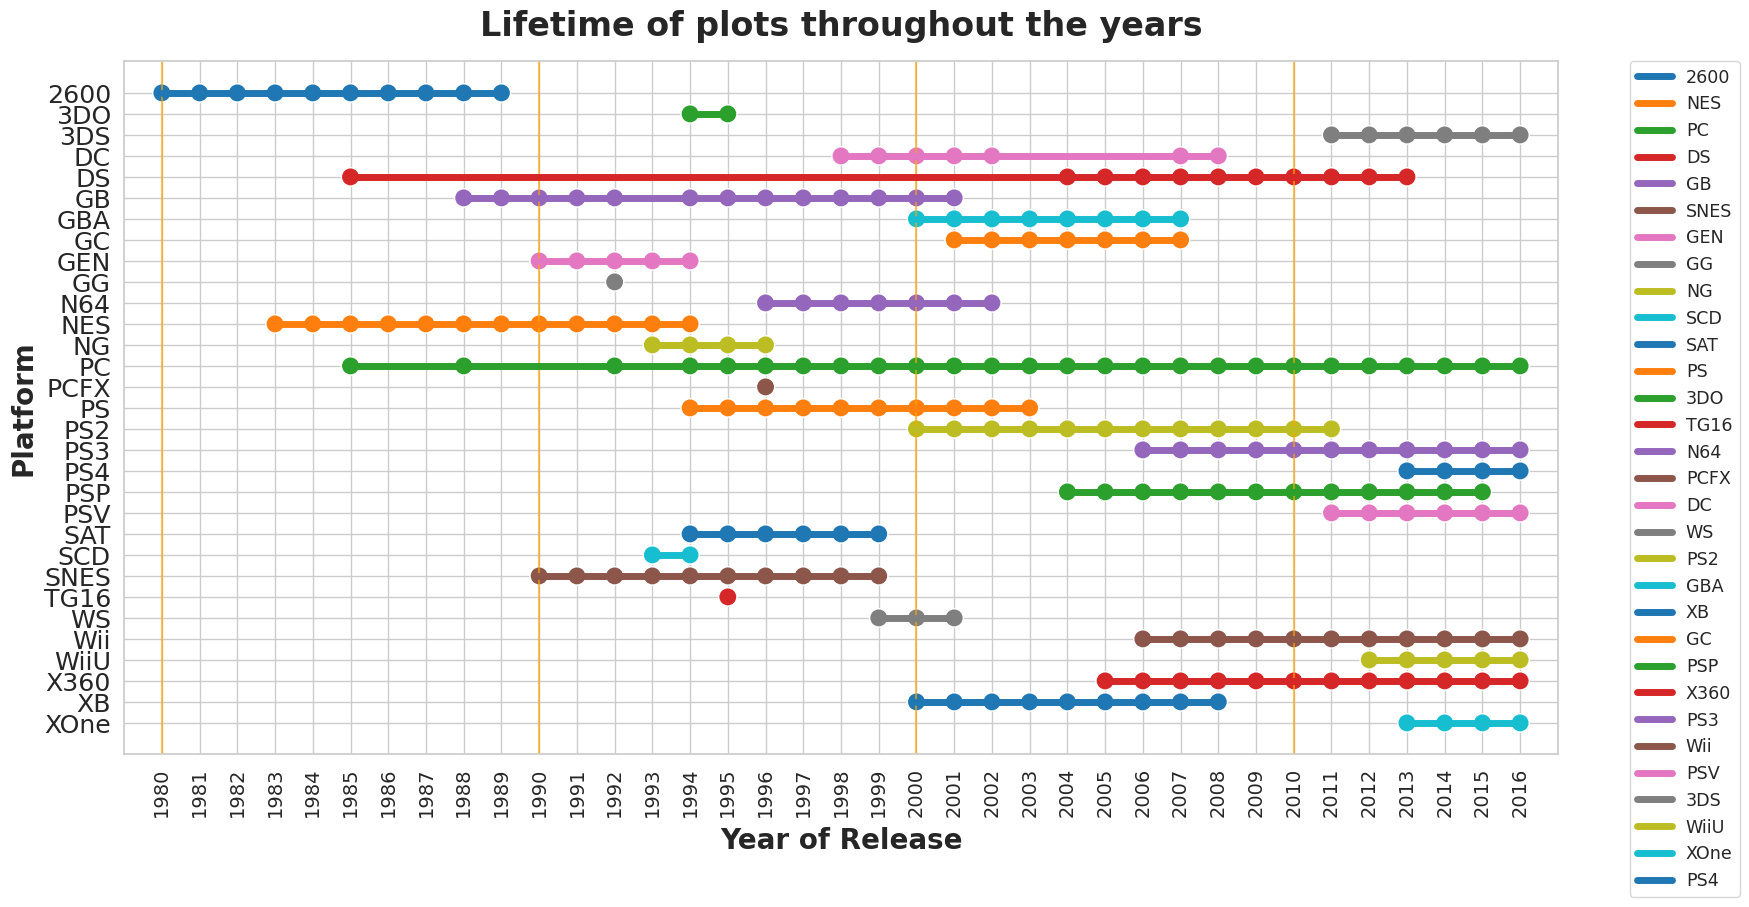

A) Some stats:

General Statistics:
Amount of platforms made in the past 4 years (2012-2016): 3 platforms
0 platforms died in less than a year (Only in the 90's)
The average lifespan of a platform: 8.6 years
The average lifetime (`active_years`) of a platform: 7.7 years

Average Lifespan statistics per era:
►  Average lifespan has decreased in 7.4% from last milenia to the new milenia.
The average lifespan for consoles made-
	In the last milenia (1980-2000): 8.9 years
	In the new milenia (2000-): 8.2 years
	In the 80's (With the PC): 19.4 years
	In the 80's (Without the PC): 16.25 years
	In the 90's (With platforms that died in a year): 4.8 years
	In the 90's (Without platforms that died in a year): 6.0 years
	In the 00's: 10.25 years

Average lifetime (`active_years`) statistics per era:
►  Average activity years or "lifetime" has rised in 13.1% from last milenia to the new milenia.
The average lifetime for consoles made-
	In the last milenia (1980-2000): 7.3 years
	In the new milenia

,platform,min,max,lifespan,active_years,activity_ratio,total_sales,sales_per_year_lifespan,sales_per_active_year,100pct_active_sales_forecast
13,PC,1985,2016,32,26,0.812,255.76,7.992,9.837,314.78
5,GB,1988,2001,14,13,0.929,254.43,18.174,19.572,274.01
11,NES,1983,1994,12,12,1.000,251.05,20.921,20.921,251.05
28,X360,2005,2016,12,12,1.000,961.24,80.103,80.103,961.24
19,PSP,2004,2015,12,12,1.000,289.53,24.128,24.128,289.54
16,PS2,2000,2011,12,12,1.000,1233.56,102.797,102.797,1233.56


─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


C) Displaying platforms with longest lifetime:

,platform,min,max,lifespan,active_years,activity_ratio,total_sales,sales_per_year_lifespan,sales_per_active_year,100pct_active_sales_forecast
13,PC,1985,2016,32,26,0.812,255.76,7.992,9.837,314.78
4,DS,1985,2013,29,11,0.379,802.78,27.682,72.980,2116.42
5,GB,1988,2001,14,13,0.929,254.43,18.174,19.572,274.01


Sales sums for the `PC` platform:
na_sales        93.34
eu_sales       140.37
jp_sales         0.17
other_sales     21.88
total_sales    255.76
dtype: float64

Sales sums for the `DS` platform:
na_sales       380.31
eu_sales       188.41
jp_sales       175.02
other_sales     59.04
total_sales    802.78
dtype: float64

Sales sums for the `GB` platform:
na_sales       113.64
eu_sales        47.51
jp_sales        85.12
other_sales      8.16
total_sales    254.43
dtype: float64
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


D) Displaying all current decade's new platforms, sorted by the newest to oldest:

,platform,min,max,lifespan,active_years,activity_ratio,total_sales,sales_per_year_lifespan,sales_per_active_year,100pct_active_sales_forecast
18,PS4,2013,2016,4,4,1.0,314.14,78.535,78.535,314.14
30,XOne,2013,2016,4,4,1.0,159.32,39.830,39.830,159.32
27,WiiU,2012,2016,5,5,1.0,82.19,16.438,16.438,82.19
2,3DS,2011,2016,6,6,1.0,257.81,42.968,42.968,257.81
20,PSV,2011,2016,6,6,1.0,53.81,8.968,8.968,53.81


In [40]:
# A) We'll need to add more data to plot the ranges of lifetime for the platforms:
# Filtering the data to show only each platform's unique years -
years_per_plats = last_to_first(games[['year_of_release', 'platform']]).sort_values('year_of_release',\
                                                                                   ascending=False).drop_duplicates()

# -------------------------------------------------------------------------------------------------------------------------
# B) Creating subplots:
# 1. Creating a plotting order
# to show platforms from the most profitable to the least profitable -
order_to_plot = years_per_plats.sort_values('year_of_release', ascending=True)['platform'].unique()

# 2.1 Creating the first subplot,
# that represents active years of each platform -
fig, ax1 = plt.subplots()
# 2.2 Adding lines showing separation between each decade -
plt.axvline(1980, 0,1, c='orange', alpha=0.65), plt.axvline(1990, 0,1, c='orange', alpha=0.65)
plt.axvline(2000, 0,1, c='orange', alpha=0.65), plt.axvline(2010, 0,1, c='orange', alpha=0.65)
# 2.3 Plotting the the active years of each platform -
ax = sns.scatterplot(data=years_per_plats, y='platform', x='year_of_release', palette='tab10',\
                      hue='platform', hue_order=order_to_plot, sizes='platform',\
                      markers=True, s = 175, legend=False)

# 3. Creating the second subplot,
# that represents lifetime of each platform -
ax2 = sns.lineplot(data=years_per_plats, y='platform', x='year_of_release', palette='tab10',\
                  hue='platform', hue_order=order_to_plot, sizes='platform',\
                  markers=True, linewidth = 5)

# -------------------------------------------------------------------------------------------------------------------------
# C) Setting custumized modification parameters for subplots:
plt.title('Lifetime of plots throughout the years',\
          fontdict = {'fontsize':24, 'fontweight':'bold'}, y=1.025)
sns.set(font_scale=1.15, style='whitegrid', rc = {'figure.figsize':(12.5,12)})
# Mods for ticks and labels -
plt.xlim(1979,2017), plt.xticks(range(1980,2017,1), rotation=90, size=14);
plt.xlabel('Year of Release', fontdict = {'fontsize':20, 'fontweight':'bold'}, labelpad=6.5);
plt.ylabel('Platform', fontdict = {'fontsize':20, 'fontweight':'bold'});
# Mods for legend
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0)

# Show subplots -
plt.show()

# -------------------------------------------------------------------------------------------------------------------------
# D) Printing some stats:
# General stats -
new_plats = len(range_per_plat[(range_per_plat['min'] >= 2012)])
died_in_a_year = len((range_per_plat[range_per_plat['lifespan'] == 0]))
# Average lifespan stats -
last_mil = range_per_plat[(range_per_plat['min'] < 2000)]['lifespan'].mean()
new_mil = range_per_plat[2000 <= range_per_plat['min']]['lifespan'].mean()
the_80s = range_per_plat[(range_per_plat['min'] < 1990) & (range_per_plat['platform'] != 'PC')]['lifespan'].mean()
all_80s = range_per_plat[(range_per_plat['min'] < 1990)]['lifespan'].mean()
the_90s = range_per_plat[(2000 > range_per_plat['min']) & (range_per_plat['min'] >= 1990) \
                         & (range_per_plat['lifespan'] != 1)]['lifespan'].mean()
all_90s = range_per_plat[(2000 > range_per_plat['min']) & (range_per_plat['min'] >= 1990)]['lifespan'].mean()
the_00s = range_per_plat[(2010 > range_per_plat['min']) & (range_per_plat['min'] >= 2000)]['lifespan'].mean()


# Average lifetime (`active_years`) stats -
act_yrs_last_mil = range_per_plat[(range_per_plat['min'] < 2000)]['active_years'].mean()
act_yrs_new_mil = range_per_plat[2000 <= range_per_plat['min']]['active_years'].mean()
act_yrs_all_80s = range_per_plat[(range_per_plat['min'] < 1990)]['active_years'].mean()
act_yrs_the_80s = range_per_plat[(range_per_plat['min'] < 1990) & (range_per_plat['platform'] != 'PC')]['active_years'].mean()
act_yrs_all_90s = range_per_plat[(2000 > range_per_plat['min']) & (range_per_plat['min'] >= 1990)]['active_years'].mean()
act_yrs_the_90s = range_per_plat[(2000 > range_per_plat['min']) & (range_per_plat['min'] >= 1990) \
                         & (range_per_plat['active_years'] != 1)]['active_years'].mean()
act_yrs_the_00s = range_per_plat[(2010 > range_per_plat['min']) & (range_per_plat['min'] >= 2000)]['active_years'].mean()

print(f"A) \033[1m\x1b[4mSome stats\x1b[0m:\n\n\033[1m\x1b[1mGeneral Statistics:\x1b[0m\n\
Amount of platforms made in the past 4 years (2012-2016): {new_plats} platforms\n\
{died_in_a_year} platforms died in less than a year (Only in the 90\'s)\n\
The average lifespan of a platform: {range_per_plat['lifespan'].mean():.2} years\n\
The average lifetime (`active_years`) of a platform: {range_per_plat['active_years'].mean():.2} years\n\n\
\033[1m\x1b[1mAverage Lifespan statistics per era:\x1b[0m\n\
►  \033[1m\x1b[1mAverage lifespan has decreased in {1- new_mil/last_mil:.1%}\
 from last milenia to the new milenia\x1b[0m.\n\
The average lifespan for consoles made-\n\
\tIn the last milenia (1980-2000): {last_mil:.2} years\n\
\tIn the new milenia (2000-): {new_mil:.2} years\n\
\tIn the 80\'s (With the PC): {all_80s} years\n\
\tIn the 80\'s (Without the PC): {the_80s} years\n\
\tIn the 90\'s (With platforms that died in a year): {all_90s:.2} years\n\
\tIn the 90\'s (Without platforms that died in a year): {the_90s:.2} years\n\
\tIn the 00\'s: {the_00s} years\n\n\
\033[1m\x1b[1mAverage lifetime (`active_years`) statistics per era:\x1b[0m\n\
►  \033[1m\x1b[1mAverage activity years or \"lifetime\" has rised in {act_yrs_new_mil/act_yrs_last_mil-1:.1%}\
 from last milenia to the new milenia\x1b[0m.\n\
The average lifetime for consoles made-\n\
\tIn the last milenia (1980-2000): {act_yrs_last_mil:.2} years\n\
\tIn the new milenia (2000-): {act_yrs_new_mil:.2} years\n\
\tIn the 80\'s (With the PC): {act_yrs_all_80s} years\n\
\tIn the 80\'s (Without the PC): {act_yrs_the_80s} years\n\
\tIn the 90\'s (With platforms that died in a year): {act_yrs_all_90s:.2} years\n\
\tIn the 90\'s (Without platforms that died in a year): {act_yrs_the_90s:.2} years\n\
\tIn the 00\'s: {act_yrs_the_00s} years",\
      end='\n\n')
print('─' * 125, end='\n\n') # divider
print('B) \033[1m\x1b[4mTop 5 most active platforms in the data\x1b[0m \
\033[1m\x1b[1m(sorted by \'active_years\')\x1b[0m:', end='')
display(range_per_plat.sort_values(by='active_years', ascending=False)[:6])
print('─' * 125, end='\n\n') # divider
# Printing longest lifespan platforms' stats:
print('\nC) \033[1m\x1b[4mDisplaying platforms with longest lifetime\x1b[0m:', end='');
display(range_per_plat[(range_per_plat['platform'] == 'PC') | (range_per_plat['platform'] == 'DS')\
                      | (range_per_plat['platform'] == 'GB')].sort_values('lifespan', ascending=False));
print('\033[1m\x1b[1mSales sums for the `PC` platform:\x1b[0m\n',\
      unique_plats[(unique_plats['platform']=='PC')].loc[:,['na_sales', 'eu_sales', 'jp_sales',
       'other_sales', 'total_sales']].sum(), sep='', end='\n\n');
print('\033[1m\x1b[1mSales sums for the `DS` platform:\x1b[0m\n',\
      unique_plats[(unique_plats['platform']=='DS')].loc[:,['na_sales', 'eu_sales', 'jp_sales',
       'other_sales', 'total_sales']].sum(), sep='', end='\n\n');
print('\033[1m\x1b[1mSales sums for the `GB` platform:\x1b[0m\n',\
      unique_plats[(unique_plats['platform']=='GB')].loc[:,['na_sales', 'eu_sales', 'jp_sales',
       'other_sales', 'total_sales']].sum(), sep='');
print('─' * 125, end='\n\n') # divider
# Printing pre-peak platforms:
print('\nD) \033[1m\x1b[4mDisplaying all current decade\'s new platforms, sorted by the newest to oldest\x1b[0m:', end='');
display((range_per_plat[(range_per_plat['min'] >= 2010)].sort_values('min',ascending=False)));

In [41]:
# Making a Series that represent each unique platform's peak year -
peak_per_plat = unique_plats[['platform', 'peak_year']].pivot_table(values='peak_year', index='platform')

# Flattening index:
idx = [x for x in peak_per_plat.index] # Salvaging the index column values
peak_per_plat['platform'] = idx        # re-Creating the originally-index column as a normal column
peak_per_plat.reset_index(drop=True,inplace=True) # Resetting index
cols = peak_per_plat.columns           # Making a variable storing all the DF columns' names
cols = cols.insert(0,'platform')       # Inserting the index as new column

# Re-indexing the DF, dropping the original index salvaged column -
peak_per_plat = peak_per_plat.reindex(columns=cols).iloc[:,:-1]

# Merging the `peak_year` column into the `range_per_ plat` column -
range_per_plat = peak_per_plat.merge(range_per_plat, on='platform', how='right')

# Adding the `years_to_peak` column,
# which shows how many years it took each platform to get to peak sales (+1 represents the peak year itself) -
range_per_plat['years_to_peak'] = range_per_plat['peak_year'] - range_per_plat['min'] + 1

# Adding the `years_to_dep` column,
# which shows how much years it took a column to depreciate after falling from the peak -
range_per_plat['years_to_dep'] = range_per_plat['max'] - range_per_plat['peak_year']

In [42]:
# A) Checking sampled rows of the new data -
print('\033[1m\x1b[4mPrinting sampled rows of the enriched DF\x1b[0m:',end='')
display(range_per_plat.sample(5))

# B) Calculating stats:
data = range_per_plat # Making an interim variable of the data to shorten code
# 1. General stats:
all_time_yrs_to_dep = data.query('max != 2016')['years_to_dep'].mean() # to exclude active platforms

# 2. Data for platforms that had at least 4 years to peak and at least 4 years lifespan:
# to include platforms that had lifespan>=4
lifespan4_yrs_to_peak = data[(data['lifespan'] >= 4) & (data['years_to_peak'] >= 4)]['years_to_peak'].mean()
lifespan4_yrs_to_dep = data[(data['max'] != 2016) & (data['lifespan'] >= 4) &\
                            (data['years_to_peak'] >= 4)]['years_to_dep'].mean()
# Add eras for platforms that have at least 4yrs pre-peak or to peak -
ls4_y2peak_80s = data[(data['lifespan'] >= 4) &\
                      (data['years_to_peak'] >= 4) & (data['min'] < 1990)]
ls4_y2peak_80s_noPC = data[(data['max'] != 2016) & (data['lifespan'] >= 4) &\
                           (data['years_to_peak'] >= 4) & (data['min'] < 1990) & (data['platform'] != "PC")]
ls4_y2peak_90s = data[(data['max'] != 2016) & (data['lifespan'] >= 4) &\
                      (data['years_to_peak'] >= 4) & (data['min'] >= 1990) & (data['min'] < 2000)]
ls4_y2peak_00s = data[(data['max'] != 2016) & (data['lifespan'] >= 4) &\
                      (data['years_to_peak'] >= 4) & (data['min'] >= 2000) & (data['min'] < 2010)]
ls4_y2peak_00s_all = data[(data['lifespan'] >= 4) &\
                      (data['years_to_peak'] >= 4) & (data['min'] >= 2000) & (data['min'] < 2010)]
# 3. Data for all the rows:
# To peak stats -
fastest_plat2peak = data.query('max!=min').sort_values('years_to_peak')[:1].iloc[0,0]
fastest_peak = data.query('max!=min').sort_values('years_to_peak')[:1].iloc[0,-2]
fp_year = data.query('max!=min').sort_values('years_to_peak')[:1].iloc[0,1]
slowest_plat2peak = data.sort_values('years_to_peak', ascending=False)[:1].iloc[0,0]
slowest_peak = data.sort_values('years_to_peak', ascending=False)[:1].iloc[0,-2]
sp_year = data.sort_values('years_to_peak', ascending=False)[:1].iloc[0,1]

# Until depreciation stats -
fastest_plat2dep = data.query('max!=min').sort_values('years_to_dep', ascending=True)[:1].iloc[0,0]
fastest_dep = data.query('max!=min').sort_values('years_to_dep', ascending=True)[:1].iloc[0,-1]
fd_year = data.query('max!=min').sort_values('years_to_dep', ascending=True)[:1].iloc[0,3]
fastest_plat2dep_x = data[(data['lifespan'] >= 4) & (data['max'] != 2016)].sort_values('years_to_dep')[:1].iloc[0,0]
fastest_dep_x = data[(data['lifespan'] >= 4) & (data['max'] != 2016)].sort_values('years_to_dep')[:1].iloc[0,-1]
fd_year_x = data[(data['lifespan'] >= 4) & (data['max'] != 2016)].sort_values('years_to_dep')[:1].iloc[0,3]
slowest_plat2dep = data.query('max!=min').sort_values('years_to_dep', ascending=False)[:1].iloc[0,0]
slowest_dep = data.query('max!=min').sort_values('years_to_dep', ascending=False)[:1].iloc[0,-1]
sd_year =  data.query('max!=min').sort_values('years_to_dep', ascending=False)[:1].iloc[0,3]

# 4. Storing eras data in variables:
last_mil = data[data['min'] < 2000]
new_mil = data[(data['min'] >= 2000) & (data['max'] != 2016)]
all_new_mil = data[(data['min'] >= 2000)]
all_80s = data[data['min'] < 1990]
the_80s = data[(data['min'] < 1990) & (data['platform'] != "PC")]
all_90s = data[(data['min'] >= 1990) & (data['min'] < 2000)]
the_90s = data[(data['min'] >= 1990) & (data['min'] < 2000) & (data['years_to_dep'] != 0)]
the_00s = data[(data['min'] >= 2000) & (data['min'] < 2010)]

# C) Printing stats -
print(f"\n\033[1m\x1b[4mSome statistics\x1b[0m:\n\n\
Average years to peak (all-time): {data['years_to_peak'].mean():.3} years\n\
Average years left after peak (all-time): {all_time_yrs_to_dep:.3} years\n\n\
The slowest platform to peak: {slowest_plat2peak} in {slowest_peak} years at {sp_year}\n\
The fastest platform to peak: {fastest_plat2peak} in {fastest_peak} year at {fp_year}\n\
The slowest platform to depreciate from peak: {slowest_plat2dep} in {slowest_dep} years at {sd_year}\n\
The fastest platform to depreciate from peak: {fastest_plat2dep} in {fastest_dep} year at {fd_year}\n\
\t★ Which also died at the same year.\n\n\
The average years to peak for consoles made-\n\
\tIn the last milenia (1980-2000): {last_mil['years_to_peak'].mean():.3} years\n\
\tIn the new milenia (2000-), concluding active platforms: {new_mil['years_to_peak'].mean():.3} years\n\
\tIn the new milenia (2000-), including active platforms: {all_new_mil['years_to_peak'].mean():.3} years\n\n\
\tIn the 80\'s (With the PC): {all_80s['years_to_peak'].mean():.3} years\n\
\tIn the 80\'s (Without the PC): {the_80s['years_to_peak'].mean():.3} years\n\
\tIn the 90\'s (With platforms that died in a year): {all_90s['years_to_peak'].mean():.3} years\n\
\tIn the 90\'s (Without platforms that died in a year): {the_90s['years_to_peak'].mean():.3} years\n\
\tIn the 00\'s: {the_00s['years_to_peak'].mean():.3} years\n\n\
The average years from peak until depreciation for consoles made-\n\
\tIn the last milenia (1980-2000): {last_mil['years_to_dep'].mean():.3} years\n\
\tIn the new milenia (2000-), concluding active platforms: {new_mil['years_to_dep'].mean():.3} years\n\
\tIn the new milenia (2000-), including active platforms: {all_new_mil['years_to_dep'].mean():.3} years\n\n\
\tIn the 80\'s (With the PC): {all_80s['years_to_dep'].mean():.3} years\n\
\tIn the 80\'s (Without the PC): {the_80s['years_to_dep'].mean():.3} years\n\
\tIn the 90\'s (With platforms that died in a year): {all_90s['years_to_dep'].mean():.3} years\n\
\tIn the 90\'s (Without platforms that died in a year): {the_90s['years_to_dep'].mean():.3} years\n\
\tIn the 00\'s: {the_00s['years_to_dep'].mean():.3} years\n\n\
\033[1m\x1b[31mStatistics for \"solid\" platforms:\n\x1b[0m\
\033[1m\x1b[4mDefinition\x1b[0m: A solid platform will be considered as one who lived more than 4 years lifespan, is at peak or pre-peak years, \n\
and not active in 2016.\n\n\
\tAverage years to peak: \
{lifespan4_yrs_to_peak:.3} years\n\
\tAverage years left after peak: {lifespan4_yrs_to_dep:.3} years\n\n\
\tThe average years to peak for consoles made-\n\
\t\tIn the 80\'s (With the PC): {ls4_y2peak_80s['years_to_peak'].mean():.3} years\n\
\t\tIn the 80\'s (Without the PC): {ls4_y2peak_80s_noPC['years_to_peak'].mean():.3} years\n\
\t\tIn the 90\'s (With platforms that died in a year): {ls4_y2peak_90s['years_to_peak'].mean():.3} years\n\
\t\tIn the 00\'s: {ls4_y2peak_00s['years_to_peak'].mean():.3} years\n\
\t\tIn the 00\'s (With active platforms in 2016): {ls4_y2peak_00s_all['years_to_peak'].mean():.3} years\n\n\
\tThe average years from peak until depreciation for consoles made-\n\
\t\tIn the 80\'s (With the PC): {ls4_y2peak_80s['years_to_dep'].mean():.3} years\n\
\t\tIn the 80\'s (Without the PC): {ls4_y2peak_80s_noPC['years_to_dep'].mean():.3} years\n\
\t\tIn the 90\'s (With platforms that died in a year): {ls4_y2peak_90s['years_to_dep'].mean():.3} years\n\
\t\tIn the 00\'s: {ls4_y2peak_00s['years_to_dep'].mean():.3} years\n\
\t\tIn the 00\'s (With active platforms in 2016): {ls4_y2peak_00s_all['years_to_dep'].mean():.3} years\n")

Printing sampled rows of the enriched DF:

,platform,peak_year,min,max,lifespan,active_years,activity_ratio,total_sales,sales_per_year_lifespan,sales_per_active_year,100pct_active_sales_forecast,years_to_peak,years_to_dep
25,WS,2000,1999,2001,3,3,1.000,1.42,0.473,0.473,1.42,2,1
11,NES,1985,1983,1994,12,12,1.000,251.05,20.921,20.921,251.05,3,9
19,PSP,2006,2004,2015,12,12,1.000,289.53,24.128,24.128,289.54,3,9
22,SCD,1993,1993,1994,2,2,1.000,1.86,0.930,0.930,1.86,1,1
13,PC,2011,1985,2016,32,26,0.812,255.76,7.992,9.837,314.78,27,5



Some statistics:

Average years to peak (all-time): 4.39 years
Average years left after peak (all-time): 4.23 years

The slowest platform to peak: PC in 27 years at 2011
The fastest platform to peak: 3DS in 1 year at 2011
The slowest platform to depreciate from peak: GB in 12 years at 2001
The fastest platform to depreciate from peak: 3DO in 0 year at 1995
	★ Which also died at the same year.

The average years to peak for consoles made-
	In the last milenia (1980-2000): 4.89 years
	In the new milenia (2000-), concluding active platforms: 4.0 years
	In the new milenia (2000-), including active platforms: 3.69 years

	In the 80's (With the PC): 11.4 years
	In the 80's (Without the PC): 7.5 years
	In the 90's (With platforms that died in a year): 2.38 years
	In the 90's (Without platforms that died in a year): 2.89 years
	In the 00's: 4.5 years

The average years from peak until depreciation for consoles made-
	In the last milenia (1980-2000): 4.0 years
	In the new milenia (2000-), conc

Plot of the average sales per year between various platforms:
      Note: Red line represents the $3M mark.


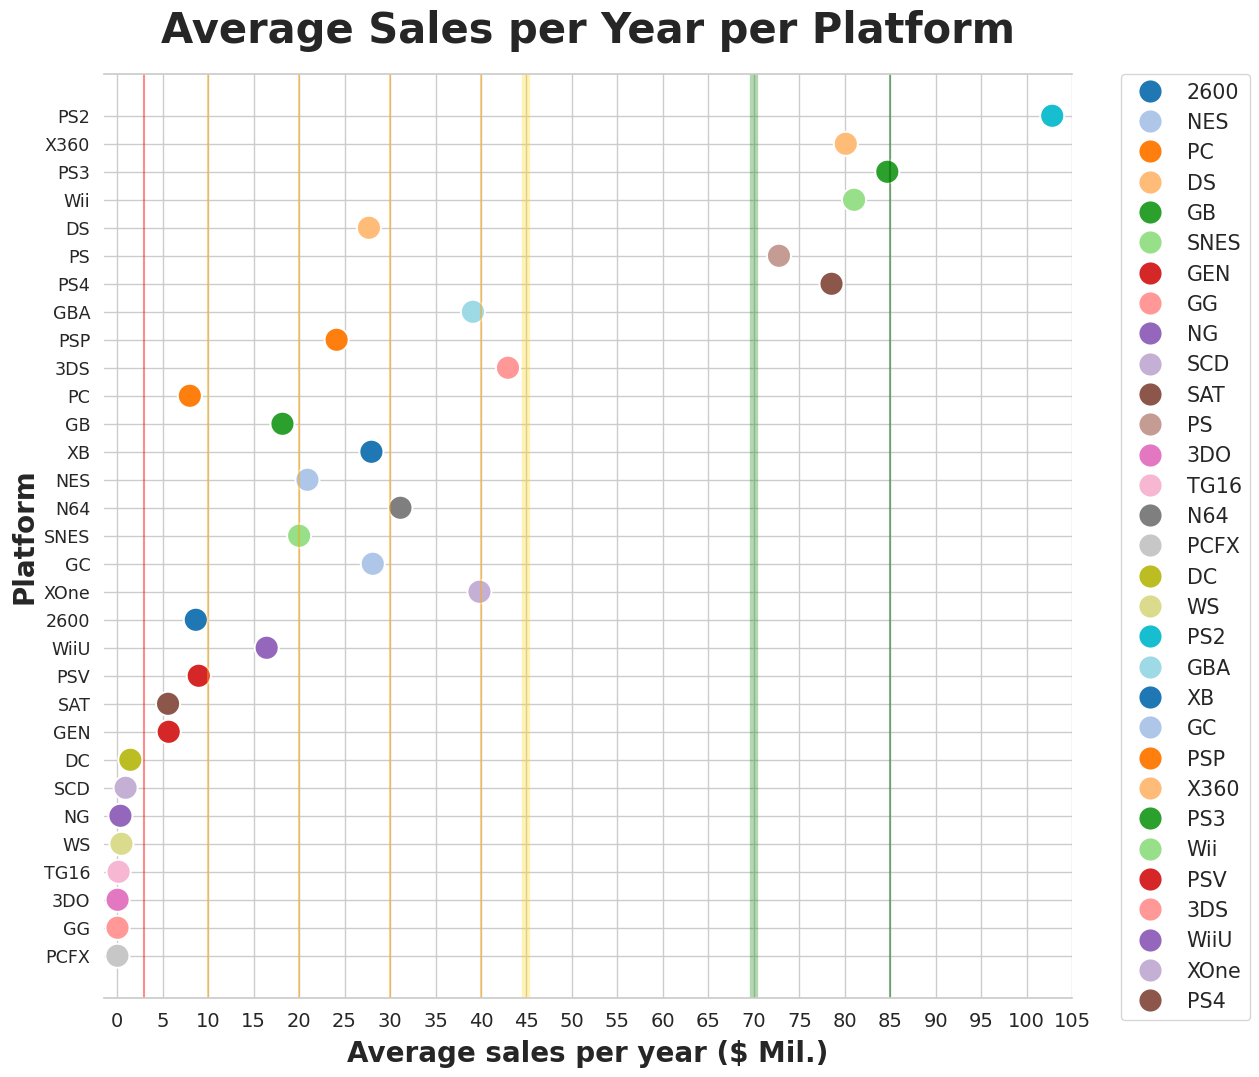

Platforms that are still used in 2016 statistics:

,platform,peak_year,min,max,lifespan,active_years,activity_ratio,total_sales,sales_per_year_lifespan,sales_per_active_year,100pct_active_sales_forecast,years_to_peak,years_to_dep
17,PS3,2011,2006,2016,11,11,1.000,931.34,84.667,84.667,931.34,6,5
26,Wii,2009,2006,2016,11,11,1.000,891.18,81.016,81.016,891.18,4,7
28,X360,2010,2005,2016,12,12,1.000,961.24,80.103,80.103,961.24,6,6
18,PS4,2015,2013,2016,4,4,1.000,314.14,78.535,78.535,314.14,3,1
2,3DS,2011,2011,2016,6,6,1.000,257.81,42.968,42.968,257.81,1,5
30,XOne,2015,2013,2016,4,4,1.000,159.32,39.830,39.830,159.32,3,1
27,WiiU,2014,2012,2016,5,5,1.000,82.19,16.438,16.438,82.19,3,2
13,PC,2011,1985,2016,32,26,0.812,255.76,7.992,9.837,314.78,27,5
20,PSV,2012,2011,2016,6,6,1.000,53.81,8.968,8.968,53.81,2,4


In [43]:
# Printing a plot description -
print('Plot of the average sales per year between various platforms:\n\
      \033[1m\x1b[4mNote\x1b[0m: Red line represents the $3M mark.')

# Adding lines showing separation between each decade -
plt.axvline(10, 0,1, c='orange', alpha=0.45), plt.axvline(30, 0,1, c='orange', alpha=0.45);
plt.axvline(40, 0,1, c='orange', alpha=0.45), plt.axvline(70, 0,1, c='green', alpha=0.3, linewidth=6);
plt.axvline(85, 0,1, c='darkgreen', alpha=0.45), plt.axvline(20, 0,1, c='orange', alpha=0.45);
plt.axvline(3, 0,1, c='red', alpha=0.45), plt.axvline(45, 0,1, c='gold', alpha=0.3, linewidth=6);

# Plotting a scatterplot for the average sales per year between various platforms -
sns.scatterplot(data=range_per_plat.sort_values('total_sales', ascending=False), x='sales_per_year_lifespan', y='platform', \
                hue='platform', s=300, palette='tab20', hue_order=order_to_plot)

# Setting customized modification parameters for plot:
plt.title('Average Sales per Year per Platform',\
          fontdict = {'fontsize':30, 'fontweight':'bold'}, y=1.025)
sns.set(font_scale=1.35, style='whitegrid', rc = {'figure.figsize':(15.5,10)})
sns.despine(left=True, top=False)
# Mods for ticks and labels -
plt.xlim(-1.5,105), plt.xticks(range(0,110,5), size=14);
plt.xlabel('Average sales per year ($ Mil.)', fontdict = {'fontsize':20, 'fontweight':'bold'}, labelpad=6.5);
plt.ylabel('Platform', fontdict = {'fontsize':20, 'fontweight':'bold'});
# Mods for legend
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0)

# Show plot -
plt.show()

# Printing the newest platforms stats -
print('\033[1m\x1b[4mPlatforms that are still used in 2016 statistics\x1b[0m:',end='')
display(range_per_plat[range_per_plat['max']==2016].sort_values('sales_per_active_year', ascending=False))

In [44]:
# Filtering the main DFs to include data only from after 2004:
print('\033[1m\x1b[4mNew DFs shares of the old data\x1b[0m:',
      end='\n\n')
# 1. Filter the base `games` DF to games made after 2004 -
new_era_games = games.query('year_of_release > 2004')
# Share of the original DF -
print(f'Share of `new_era_games` from the original `games` DF: \
\033[1m\x1b[1m{len(new_era_games) / len(games):.2%}\x1b[0m rows of the original DF')

# 2. Filter the aggregated `unique_games` DF -
ne_uniq_games = unique_games.query('year_of_release > 2004')
# Share of the original DF -
print(f'Share of `ne_uniq_games` of the original `unique_games` DF: \
\033[1m\x1b[1m{len(ne_uniq_games) / len(unique_games):.2%}\x1b[0m of the games')

# 3. Filter the aggregated `unique_plats` DF -
ne_uniq_plats = unique_plats.query('year_of_release > 2004')
# Share of the original DF -
print(f'Share of `ne_uniq_plats` of the original `unique_plats` DF: \
\033[1m\x1b[1m{len(ne_uniq_plats) / len(unique_plats):.2%}\x1b[0m of the rows')

# 4. Filter the `ranges_per_plat` DF -
ne_ranges = range_per_plat[range_per_plat['max'] >= 2004]
# Share of the original DF -
print(f'Share of platforms that were in the market from 2004 and forth from the total amount: \
\033[1m\x1b[1m{len(ne_ranges) / len(range_per_plat):.2%}\x1b[0m of the platforms')

New DFs shares of the old data:

Share of `new_era_games` from the original `games` DF: 68.55% rows of the original DF
Share of `ne_uniq_games` of the original `unique_games` DF: 63.90% of the games
Share of `ne_uniq_plats` of the original `unique_plats` DF: 46.22% of the rows
Share of platforms that were in the market from 2004 and forth from the total amount: 51.61% of the platforms


In [45]:
# Presenting some stats about the PS4 platform itself -
print('\033[1m\x1b[4mStats on PS4 itself\x1b[0m:',end='')
display(ne_ranges[ne_ranges['platform']=='PS4']);

# Presenting some stats about the PS4 platform through years -
print('\n\033[1m\x1b[4mStats for PS4 through years\x1b[0m:',end='')
display(ne_uniq_plats[ne_uniq_plats['platform']=='PS4']);

Stats on PS4 itself:

,platform,peak_year,min,max,lifespan,active_years,activity_ratio,total_sales,sales_per_year_lifespan,sales_per_active_year,100pct_active_sales_forecast,years_to_peak,years_to_dep
18,PS4,2015,2013,2016,4,4,1.0,314.14,78.535,78.535,314.14,3,1



Stats for PS4 through years:

,platform,year_of_release,eu_sales,jp_sales,mean_yearly_sales,na_sales,other_sales,total_sales,peak_year
699,PS4,2013,11.05,0.94,0.406094,10.13,3.87,25.99,2015
700,PS4,2014,46.50,2.97,0.444444,34.75,15.78,100.00,2015
701,PS4,2015,51.76,6.31,0.433942,42.37,18.46,118.90,2015
702,PS4,2016,31.78,5.74,0.422256,21.49,10.24,69.25,2015


In [46]:
# Filtering the `ne_games` data to include only rows where the 'PS4' is the platform -
ps4_data = new_era_games.query('platform == "PS4"')

# Printing some information on the new data -
print(f'\033[1m\x1b[1mShare of `ps4_data` rows from the original `new_era_games` DF:\x1b[0m \
{len(ps4_data) / len(new_era_games):.2%} rows of the DF\n\n\
\033[1m\x1b[4mPrinting the data\'s information\x1b[0m:\n')
ps4_data.info()

Share of `ps4_data` rows from the original `new_era_games` DF: 3.48% rows of the DF

Printing the data's information:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 392 non-null    object  
 1   platform             392 non-null    category
 2   year_of_release      392 non-null    int64   
 3   genre                392 non-null    category
 4   na_sales             392 non-null    float64 
 5   eu_sales             392 non-null    float64 
 6   jp_sales             392 non-null    float64 
 7   other_sales          392 non-null    float64 
 8   critic_score         252 non-null    float64 
 9   user_score           257 non-null    float64 
 10  rating               392 non-null    category
 11  total_sales          392 non-null    float64 
 12  years_since_release  392 non-null    int64   
 13  mea

In [47]:
#Creating a unique platforms list -
uniq_list = range_per_plat[range_per_plat['max']==2016].sort_values\
('sales_per_active_year', ascending=False)['platform'].unique()

# Creating DF where there's a values counts for rows `critic_score` is null -
critic_score = new_era_games[new_era_games['platform'].isin(uniq_list)]\
[(new_era_games['critic_score'].isna())]['platform'].value_counts() / new_era_games['platform'].value_counts()
critic_score = pd.DataFrame(critic_score, index=critic_score.index); # Turning to DF
critic_score.columns = ['score'] #Changing to a uniting column name
critic_score.index.names = ['platform'] # Re-calling index
critic_score['section'] = 'critic_score' # Creation uniting identifier

# Creating DF where there's a values counts for rows `user_score` is null -
user_score = new_era_games[new_era_games['platform'].isin(uniq_list)]\
[(new_era_games['user_score'].isna())]['platform'].value_counts() / new_era_games['platform'].value_counts()
user_score = pd.DataFrame(user_score, index=user_score.index); # Turning to DF
user_score.columns = ['score'] #Changing to a uniting column name
user_score.index.names = ['platform'] # Re-calling index
user_score['section'] = 'user_score' # Creation uniting identifier

# Appending DFs to each other -
miss_scores = critic_score.append(user_score).dropna();

# Plotting shares of missing values from columns -
fig = px.bar(miss_scores, y='score', x=miss_scores.index, color='section', barmode='group', \
             title='Share of missing values of `user_score` and `critic_score` from all active platforms',\
             width=1000, height=475, color_discrete_sequence=["blue", "goldenrod"], labels={'score':'Score',\
                                                                                           'platform':'Platform'})
fig.update_xaxes(position=0.5)
fig.update_layout(legend_title_font_size=3)
fig.update_yaxes(range=[0,1])
fig.update_layout(yaxis_tickformat = '%')

# Show plot -
fig.show()

In [48]:
# Printing a correlation matrix -
ps4_data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,years_since_release,mean_yearly_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032,-1.000000,-0.005272
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160,0.248961,0.797193
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157,0.208306,0.878931
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129,0.060993,0.489071
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051,0.234796,0.889793
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568,0.021142,0.388011
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957,-0.152447,-0.039082
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000,0.235032,0.893812
years_since_release,-1.000000,0.248961,0.208306,0.060993,0.234796,0.021142,-0.152447,0.235032,1.000000,0.005272
mean_yearly_sales,-0.005272,0.797193,0.878931,0.489071,0.889793,0.388011,-0.039082,0.893812,0.005272,1.000000


In [49]:
# Dropping the missing values -
filt_ps4 = ps4_data.dropna()

# Printing the amount of rows left -
print(f'The `filt_ps4` DF has taken {len(filt_ps4)} rows out of the original DF\'s {len(ps4_data)}.\n\n\
\033[1m\x1b[4mPlease note that the plots below are interactive\x1b[0m.')

# Plotting the relation between the critic score to total sales -
fig = px.scatter(filt_ps4, y='total_sales', x='critic_score', color='genre', opacity=0.7, \
                 range_x=[15,100] , range_y=[-0.25,6], trendline='lowess', \
                title='Relation between the critic score and total sales')

# Plot modification:
fig.update_xaxes(position=0.5)
fig.update_layout(title_font_size=22, legend_title_font_size=16, xaxis_title="Critic Score", yaxis_title="Total Sales")
fig.update_layout(legend_title='Genre')

# Show plot -
fig.show()

# Plotting the relation between the user score to total sales -
fig = px.scatter(filt_ps4, y='total_sales', x='user_score', color='genre', opacity=0.7, \
                 range_x=[1,10] , range_y=[-0.25,5], trendline='lowess', \
                title='Relation between the user score and total sales')

# Plot modification:
fig.update_xaxes(position=0.5)
fig.update_layout(title_font_size=22, legend_title_font_size=16, xaxis_title="User Score", yaxis_title="Total Sales")
fig.update_layout(legend_title='Genre')

# Show plot -
fig.show()

The `filt_ps4` DF has taken 249 rows out of the original DF's 392.

Please note that the plots below are interactive.


In [50]:
# Making a list of all unique games sold on the PS4 -
uniq_games_ps4 = ps4_data['name'].unique().tolist();

# Make a filtered DF of the same games from all other platforms -
other_data = new_era_games.query('platform != "PS4"');
other_data = other_data[other_data['name'].isin(uniq_games_ps4)];

# Create an identifier column -
other_data['section'] = 'others'
ps4_data['section'] = 'PS4'

# Appending the DFs to each other -
total_filt = ps4_data.append(other_data);

In [51]:
# Plotting the sales of the PS4 unique games compared to the same games on other platforms -
fig = px.scatter(total_filt, y='total_sales', x='platform', color='section', opacity=0.7, \
                 range_y=[-0.25,22], width=950, height=650, \
                 title='Unique PS4 games sales vs. other platforms sales, per same games')

# Plot modification:
fig.update_xaxes(position=0.5)
fig.update_layout(title_font_size=22, legend_title_font_size=16, legend_title='', \
                  xaxis_title="Platform", yaxis_title="Total Sales", uniformtext_mode='hide')
fig.update_traces(marker=dict(size=12),
                  selector=dict(mode='markers'))
# Show plot -
fig.show()

# Plotting the total sales of the PS4 vs. others of the PS4's unique games -
fig = px.bar(total_filt, y='total_sales', x='platform', color='section', opacity=0.7, \
                  width=950, height=650, text='name', \
                 title='Sales of the PS4 games, PS4 vs. other platforms')

# Plot modification:
fig.update_xaxes(position=0.5)
fig.update_layout(title_font_size=22, legend_title_font_size=16, legend_title='', \
                  xaxis_title="Platform", yaxis_title="Total Sales", \
                  uniformtext_mode='hide')
fig.update_traces(marker=dict(size=12), selector=dict(mode='markers'),
                  textposition='inside')
# Show plot -
fig.show()

In [52]:
# Plotting the total sales per genre, divided in each genre by sales of unique games, in a barplot -
fig = px.bar(ps4_data, x='total_sales', y='genre', color='genre', text='name', opacity=0.7, \
                  width=1000, height=700, range_x=[0,100], \
                 title='Genre effect over total sales PS4 games')

# Plot modification:
fig.update_xaxes(position=0.5)
fig.update_layout(title_font_size=22, legend_title_font_size=16, legend_title='Genre', \
                  xaxis_title="Total Sales", yaxis_title="Genre", \
                  uniformtext_mode='hide')
# Show plot -
fig.show()

# Plotting the total sales per genre, divided in each genre by specific games sales, in a scatterplot -
fig = px.scatter(ps4_data, y='total_sales', x='genre', color='genre', opacity=0.65, \
                  width=1000, height=700, range_y=[0,15], \
                 title='Genre effect over total PS4 sales in specific games')

# Plot modification:
fig.update_xaxes(position=0.5)
fig.update_layout(title_font_size=22, legend_title_font_size=16, legend_title='Genre', \
                  xaxis_title="Genre", yaxis_title="Total Sales", \
                  uniformtext_mode='hide')
fig.update_traces(marker=dict(size=12), selector=dict(mode='markers'))
# Show plot -
fig.show()

In [53]:
# A) Print the total sales number for each genre:
uniq_genres = new_era_games['genre'].unique().tolist() # Storing data in variable
print('\033[1m\x1b[4mTotal sales of each genre\x1b[0m:') # Printing data
for g in uniq_genres:
    print(f"{g} - {new_era_games[new_era_games['genre']==g]['total_sales'].sum():.5}")

# ------------------------------------------------------------------------------------------------------------------------
# B) First plot
# Plotting the total sales per genre, divided in each genre by unique games -
fig = px.bar(new_era_games, x='total_sales', y='genre', color='genre', opacity=0.99, \
                  width=750, height=700, range_x=[0,1290],\
                 title='Genre effect over total sales in all platforms')

# Plot modification:
fig.update_xaxes(position=0.5);
fig.update_layout(title_font_size=26, legend_title_font_size=16, legend_title='Genre', \
                  xaxis_title="Total Sales", yaxis_title="Genre", \
                  uniformtext_mode='hide');
# Show plot -
fig.show()

# ------------------------------------------------------------------------------------------------------------------------
# C) Second plot
# Printing a note -
print('\033[1m\x1b[32mPlease note\x1b[0m: \
The second plot (below) contains an outlier for the `Sports` genre worth 82.54M dollars.', end='')
# Plotting the total sales per genre, divided in each genre by specific games sales, in a scatterplot -
fig = px.scatter(new_era_games, y='total_sales', x='genre', color='genre', opacity=0.35, \
                  width=1050, height=700, range_y=[-0.5,36.5], \
                 title='Genre effect over total sales within all platforms in specific games sales')

# Plot modification:
fig.update_xaxes(position=0.5)
fig.update_layout(title_font_size=18, legend_title_font_size=16, legend_title='Genre', \
                  xaxis_title="Genre", yaxis_title="Total Sales", \
                  uniformtext_mode='hide')
fig.update_traces(marker=dict(size=12), selector=dict(mode='markers'))
# Show plot -
fig.show()

# ------------------------------------------------------------------------------------------------------------------------
# D) Printing the average sales per genre's game stat, that shows each genre's
# total sales divided by it's amount of games, presenting a mean game total sales:
print('\033[1m\x1b[4mAverage sales per game of each genre\x1b[0m:') # Printing data
for g in uniq_genres:
    print(f"{g} - {new_era_games[new_era_games['genre']==g]['total_sales'].mean():.5}")

Total sales of each genre:
Sports - 853.34
Racing - 355.03
Platform - 303.06
Misc - 615.83
Simulation - 269.62
Action - 1202.0
Role-Playing - 550.78
Puzzle - 110.28
Shooter - 758.56
Fighting - 208.07
Adventure - 149.81
Strategy - 78.42


Please note: The second plot (below) contains an outlier for the `Sports` genre worth 82.54M dollars.

Average sales per game of each genre:
Sports - 0.61747
Racing - 0.55647
Platform - 0.71645
Misc - 0.45017
Simulation - 0.41866
Action - 0.46699
Role-Playing - 0.51619
Puzzle - 0.27639
Shooter - 0.91064
Fighting - 0.45629
Adventure - 0.14067
Strategy - 0.18583


In [54]:
# A) Creating a filtered DF for `platform` -
filt_range_reg = new_era_games[['platform', 'na_sales', 'eu_sales', 'jp_sales']]
filt_range_reg = filt_range_reg.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales'],\
                          index='platform', aggfunc='sum')
# Merging sales data for all regions into the `ne_ranges` DF -
ne_ranges = ne_ranges.merge(filt_range_reg,on='platform', how='left') # This DF will be used for `platform` data

# ------------------------------------------------------------------------------------------------------------------------
# B) Creating a filtered DF for `genre` -
genre_per_region = new_era_games[['genre', 'na_sales', 'eu_sales', 'jp_sales']]
genre_per_region = genre_per_region.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales'],\
                          index='genre', aggfunc='sum') # This DF will be used for `genre` data
# Flattening `genre_per_region` index:
idx = [x for x in genre_per_region.index] # Salvaging the index column values
genre_per_region['genre'] = idx        # re-Creating the originally-index column as a normal column
genre_per_region.reset_index(drop=True,inplace=True) # Resetting index
cols = genre_per_region.columns           # Making a variable storing all the DF columns' names
cols = cols.insert(0,'genre')       # Inserting the index as new column

# Re-indexing the DF, dropping the original index salvaged column -
genre_per_region = genre_per_region.reindex(columns=cols).iloc[:,:-1]

# ------------------------------------------------------------------------------------------------------------------------
# C) Create a filtered DF to compare the ESRB `rating` to sales of each region -
esrb_region = new_era_games[['rating','na_sales', 'eu_sales', 'jp_sales']]

In [55]:
# A) Creating a dictionary of the regions to explore -
reg_list = ['na_sales', 'eu_sales', 'jp_sales']

# ------------------------------------------------------------------------------------------------------------------------
# B) Defining the region_review() function
# that shows effect of genre and platform over region from the dictionary above -
def region_review(df, sales_reg):
    group_list = ['genre', 'platform'] # Storing groupby values
    reg_name = sales_reg # Storing area name

    for g in group_list:
        # Plotting the plot -
        sns.lineplot(data=df, x='year_of_release', y=sales_reg, hue=g, ci=None, \
                 palette='tab20', sizes=g, markers=True, linewidth = 3.5)

        # Setting custumized modification parameters for subplots:
        gen = g.capitalize() # Setting interim variable
        plt.title(f"{gen} effect over '{reg_name}' sales, per year",\
                  fontdict = {'fontsize':24, 'fontweight':'bold'}, y=1.025)
        sns.set(font_scale=1.15, style='whitegrid', rc = {'figure.figsize':(16.5,6)})
        # Mods for ticks and labels -
        plt.xlim(2004.75,2016.25), plt.xticks(range(2005,2017,1), rotation=10, size=14);
        plt.xlabel('Year of Release', fontdict = {'fontsize':20, 'fontweight':'bold'}, labelpad=6.5);
        plt.ylabel(f"{reg_name} Sales", fontdict = {'fontsize':20, 'fontweight':'bold'});
        # Mods for legend
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper right', borderaxespad=0)
        plt.show()


# ------------------------------------------------------------------------------------------------------------------------
# C) Defining the top_n() function -
def top_n(df, lboard_col, top5_parameter, top=5, ascend=False, xtra_lb_col=True):
    '''
    The top_n() function takes a DataFrame\'s column (i.e. leaderboard column), sort it,
    and return the top n rows after it is sorted.

    Parameters:
    df: DataFrame.
    lboard_col: The column to sort the DataFrame by; The "leaderboard" column.
    top5_parameter: The values in the top-n that's returned.
    top: Amount of leaderboard rows. Based at 5.
    ascend: Set to False by default to return a descending leaderboard. Check True to return a rising leaderboard.
    xtra_lb_col: Return both given columns (lboard_col and top5_parameter).
    '''
    n=top
    if xtra_lb_col== True:
        return df.sort_values(lboard_col, ascending = ascend)\
    .reset_index(drop=True).loc[:,[top5_parameter, lboard_col]][:n]

    else:
        return df.sort_values(lboard_col, ascending = ascend).reset_index(drop=True)[top5_parameter][:n]

# ------------------------------------------------------------------------------------------------------------------------
# Making an automated plotting for loop that creates user profile per region:
print('\t\t\t\t\033[1m\x1b[31mInitialting user profile automation process...\x1b[0m\n')
for r in reg_list:
    print(f'\033[1m\x1b[31mPrinting plots for region:\x1b[0m \033[1m\x1b[4m\'{r}\'\x1b[0m-\n\
    Note: Remember data for 2016 may be incomplete.')
    region_review(new_era_games, r)
    print(f'Printing the "{r}" region top five genres:')
    display(top_n(genre_per_region, r, 'genre'))
    print(f'\nPrinting the "{r}" region top five platforms')
    display(top_n(ne_ranges,r,'platform'))
    # Plotting relation between ESRB rating to sales -
    fig = px.bar(esrb_region, y='rating', x=r, \
                 text='rating', title='Effect of ESRB rating over on sales on the region')
    # Plot modification:
    fig.update_xaxes(position=0.5)
    fig.update_layout(title_font_size=18, legend_title_font_size=16, legend_title='Genre', \
                      xaxis_title="Total Sales", yaxis_title="ESRB Rating", \
                      uniformtext_mode='hide')
    # Show plot -
    fig.show()
    print('─' * 125, end='\n\n') # divider
    print('\t\t\t\t\033[1m\x1b[32mUser profile automation process complete\x1b[0m\n')



Output hidden; open in https://colab.research.google.com to view.

In [56]:
# Setting the arrays for testing -
sample_1 = games[games['platform']=='XOne']['user_score']
sample_2 = games[games['platform']=='PC']['user_score']

# Setting the alpha -
alpha = 0.03

# Performing the T-test -
results = st.ttest_ind(sample_1, sample_2,nan_policy='omit')

# Printing the results of the test -
print(f"\033[1m\x1b[1mp-value:\x1b[0m {results.pvalue}")

if results.pvalue < alpha:
    print('The null hypothesis is \033[1m\x1b[31mrejected\x1b[0m')
else:
    print('The null hypothesis \033[1m\x1b[32mcannot be rejected\x1b[0m')

p-value: 1.3037979620149106e-05
The null hypothesis is rejected


In [57]:
# Setting the arrays for testing -
sample_1 = games[games['genre']=='Action']['user_score']
sample_2 = games[games['genre']=='Sports']['user_score']

# Setting the alpha -
alpha = 0.03

# Performing the T-test -
results = st.ttest_ind(sample_1, sample_2,nan_policy='omit')

# Printing the results of the test -
print(f"\033[1m\x1b[1mp-value:\x1b[0m {results.pvalue}")

if results.pvalue < alpha:
    print('The null hypothesis is \033[1m\x1b[31mrejected\x1b[0m')
else:
    print('The null hypothesis \033[1m\x1b[32mcannot be rejected\x1b[0m')

p-value: 0.06833686503882228
The null hypothesis cannot be rejected
